## Import packages

In [ ]:
import pandas as pd
import pandas_gbq
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('movie_dataset.csv')

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## Exploring what the dataset looks like

In [ ]:
df.shape

(1113575, 24)

In [ ]:
print(df.head())

       id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path  ...  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  ...   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  ...   

    original_title                                           overview  \
0        Inception 

## Cleaning data - removing adult content

In [ ]:
# first we are counting how many rows/movies there are that are considered adult.

# Count rows where 'adult' is True
true_count = df[df['adult'] == True].shape[0]

# Count rows where 'adult' is False
false_count = df[df['adult'] == False].shape[0]

# Print the counts
print(f"Number of rows where 'adult' is True: {true_count}")
print(f"Number of rows where 'adult' is False: {false_count}")

Number of rows where 'adult' is True: 103229
Number of rows where 'adult' is False: 1010346


In [ ]:
# now, we are dropping all the rows were adult = true.

# Step 1: Dropping rows where adult = true to get rid of all the adult content.
df_adult = df[df['adult'] != True]

# Count rows where 'adult' is True
true_count = df_adult[df_adult['adult'] == True].shape[0]

# Count rows where 'adult' is False
false_count = df_adult[df_adult['adult'] == False].shape[0]

print(f"Number of rows where 'adult' is True: {true_count}")
print(f"Number of rows where 'adult' is False: {false_count}")

# below we can see that the adult movies have been successfully dropped.

Number of rows where 'adult' is True: 0
Number of rows where 'adult' is False: 1010346


## Cleaning data - dropping irrelevant columns

In [ ]:
# now, we are dropping any irrelevant columns to clean the dataset.

df_dropped = df_adult.drop(columns=['keywords', 'adult', 'status', 'backdrop_path', 'homepage', 'imdb_id', 'overview', 'poster_path', 'tagline'])
df_dropped.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,2010-07-15,825532764,148,160000000,en,Inception,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,2014-11-05,701729206,169,165000000,en,Interstellar,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,185000000,en,The Dark Knight,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,2009-12-15,2923706026,162,237000000,en,Avatar,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,2012-04-25,1518815515,143,220000000,en,The Avengers,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [ ]:
df_dropped.shape

# this number matches the number where adult is false 2 cells above. this means after dropping the columns, we've still retained all our rows.

(1010346, 15)

## Filtering movies on English only

In [ ]:
# now, we are filtering on the movies where their original language is english.

# Display unique values in 'original_language' before filtering
unique_languages_before = df_dropped['original_language'].unique()
print("Unique languages before filtering:")
print(unique_languages_before)

Unique languages before filtering:
['en' 'ko' 'fr' 'ja' 'it' 'es' 'pl' 'pt' 'hi' 'tr' 'da' 'de' 'cn' 'id'
 'zh' 'sv' 'el' 'ru' 'sr' 'fa' 'th' 'ar' 'no' 'nb' 'fi' 'te' 'la' 'nl'
 'hu' 'he' 'is' 'ro' 'gl' 'uk' 'eu' 'et' 'bs' 'bn' 'xx' 'sh' 'km' 'cs'
 'tn' 'ml' 'mk' 'ga' 'hy' 'ku' 'ka' 'ta' 'kn' 'tl' 'vi' 'ca' 'dz' 'sw'
 'kk' 'wo' 'sk' 'mi' 'lv' 'bo' 'mn' 'ps' 'lt' 'ur' 'sl' 'sc' 'af' 'hr'
 'se' 'iu' 'ms' 'bm' 'mr' 'bg' 'am' 'cy' 'lo' 'xh' 'qu' 'yi' 'yo' 'sq'
 'pa' 'eo' 'gu' 'zu' 'st' 'ne' 'ak' 'mt' 'as' 'rw' 'ln' 'ay' 'si' 'mo'
 'so' 'ff' 'ky' 'kl' 'ab' 'ik' 'az' 'jv' 'li' 'fo' 'sn' 'tg' 'su' 'my'
 'ks' 'ht' 'lb' 'rm' 'ha' 'sa' 'sm' 'tk' 'fy' 'om' 'ny' 'or' 'gd' 'be'
 'bi' 'uz' 'cr' 'mg' 'mh' 'tw' 'ia' 'gn' 'co' 'nn' 'nv' 'os' 'tt' 'ig'
 'ug' 'dv' 'sd' 'oc' 'ba' 'nd' 'sg' 'kw' 'ie' 'aa' 'ty' 'lg' 'fj' 'ce'
 'to' 'kg' 'ti' 'nr' 'av' 'ss' 'cv' 'kv' 'kj' 'za' 'oj' 'br' 'hz' 'ch'
 'an' 'rn' 'ki' 'ii' 'ts' 'gv']


In [ ]:
count_en_before = df_dropped[df_dropped['original_language'] == 'en'].shape[0]
print("Number of English movies before filtering:", count_en_before)

Number of English movies before filtering: 521081


In [ ]:
df_english = df_dropped[df_dropped['original_language'] == 'en']

In [ ]:
# Display unique values in 'original_language' after filtering
unique_languages_after = df_english['original_language'].unique()
print("\nUnique languages after filtering:")
print(unique_languages_after)

# below we can see we only have english movies


Unique languages after filtering:
['en']


In [ ]:
# Count the number of English movies after filtering
count_en_after = df_english.shape[0]
print("Number of English movies after filtering:", count_en_after)

Number of English movies after filtering: 521081


## Filtering movies on the last 50 years

In [ ]:
# now we want to filter the movies that were released in the last 50 years.
# first, we must convert release_date to a datetime.

df_english.info()

df_english['release_date'] = pd.to_datetime(df_english['release_date'])

<class 'pandas.core.frame.DataFrame'>
Index: 521081 entries, 0 to 1113574
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    521081 non-null  int64  
 1   title                 521069 non-null  object 
 2   vote_average          521081 non-null  float64
 3   vote_count            521081 non-null  int64  
 4   release_date          419363 non-null  object 
 5   revenue               521081 non-null  int64  
 6   runtime               521081 non-null  int64  
 7   budget                521081 non-null  int64  
 8   original_language     521081 non-null  object 
 9   original_title        521069 non-null  object 
 10  popularity            521081 non-null  float64
 11  genres                313589 non-null  object 
 12  production_companies  194388 non-null  object 
 13  production_countries  235829 non-null  object 
 14  spoken_languages      238506 non-null  object 
dtypes: f

In [ ]:
df_english.info()

# it is now a date time.

<class 'pandas.core.frame.DataFrame'>
Index: 521081 entries, 0 to 1113574
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    521081 non-null  int64         
 1   title                 521069 non-null  object        
 2   vote_average          521081 non-null  float64       
 3   vote_count            521081 non-null  int64         
 4   release_date          419363 non-null  datetime64[ns]
 5   revenue               521081 non-null  int64         
 6   runtime               521081 non-null  int64         
 7   budget                521081 non-null  int64         
 8   original_language     521081 non-null  object        
 9   original_title        521069 non-null  object        
 10  popularity            521081 non-null  float64       
 11  genres                313589 non-null  object        
 12  production_companies  194388 non-null  object        
 13  pro

In [ ]:
df_english.shape

(521081, 15)

## Filtering on the last 50 years

In [ ]:
# now we're filtering on the last 50 years.

# Get the current year
current_year = pd.Timestamp.today().year

# Define the minimum year (50 years ago)
min_year = current_year - 50

# Filter for the last 50 years and save it as df_50
df_50 = df_english[
    (df_english['release_date'].dt.year >= min_year) &
    (df_english['release_date'].dt.year <= current_year)
]

# Display the resulting DataFrame after the filter
df_50.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,2010-07-15,825532764,148,160000000,en,Inception,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,2014-11-05,701729206,169,165000000,en,Interstellar,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,185000000,en,The Dark Knight,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,2009-12-15,2923706026,162,237000000,en,Avatar,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,2012-04-25,1518815515,143,220000000,en,The Avengers,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [ ]:
# checking that we've succesfully filtered.

min_release_date = df_50['release_date'].min()
print("Minimum release date in the DataFrame:", min_release_date)

#we've successfully dropped movies above 50 years.

Minimum release date in the DataFrame: 1974-01-01 00:00:00


## Cleaning up nulls - Title

In [ ]:
# now we're going clean up the nulls.

null_counts = df_50.isnull().sum()
print("Null values in each column:\n", null_counts)

Null values in each column:
 id                           0
title                        4
vote_average                 0
vote_count                   0
release_date                 0
revenue                      0
runtime                      0
budget                       0
original_language            0
original_title               4
popularity                   0
genres                  110906
production_companies    212041
production_countries    175272
spoken_languages        166517
dtype: int64


In [ ]:
# first we drop the nulls in the title. here, we are counting how many there are

# Count the number of null values in the 'title' column
null_count = df_50['title'].isnull().sum()

# Calculate the percentage of null values in the 'title' column
total_rows = len(df_50)
null_percentage = (null_count / total_rows) * 100

# Display the results
print(f"Number of nulls in 'title': {null_count}")
print(f"Percentage of nulls in 'title': {null_percentage:.2f}%")

Number of nulls in 'title': 4
Percentage of nulls in 'title': 0.00%


In [ ]:
#we're dropping the nulls in title here.

df_50_dropped = df_50.dropna(subset=['title'])

null_count_after = df_50_dropped['title'].isnull().sum()
print("\nNumber of nulls in 'title' after dropping:", null_count_after)


Number of nulls in 'title' after dropping: 0


In [ ]:
#these are the number of nulls in title before dropping


# Count the number of duplicate titles
duplicate_count = df_50_dropped.duplicated(subset='title').sum()

# Calculate the percentage of duplicate titles
total_rows = len(df_50_dropped)
duplicate_percentage = (duplicate_count / total_rows) * 100

# Display the results
print(f"Number of duplicate titles: {duplicate_count}")
print(f"Percentage of duplicate titles: {duplicate_percentage:.2f}%")

Number of duplicate titles: 42626
Percentage of duplicate titles: 12.22%


## Cleaning duplicates - Title

In [ ]:
# here, we are looking at the titles where there is more than one occurance.


duplicate_titles = df_50_dropped.groupby('title').size().reset_index(name='count')

# Filter to keep only titles with more than 1 occurrence
duplicate_titles = duplicate_titles[duplicate_titles['count'] > 1]

# Display the DataFrame with duplicate titles and their counts
print("Duplicate Titles with Counts:")
print(duplicate_titles)

Duplicate Titles with Counts:
                                                    title  count
28                 "Doctor Who" The End of Time: Part Two      2
86                                              "concept"      2
97                                                     #1      3
100             #1 Top Selling Best Comedy Special Ever!!      2
106                                                    #2      2
...                                                   ...    ...
305312  there will Never Ever be another driver like D...      2
305569                                             window      2
305641                                            ¡Nails!      2
305808                                              Órale      2
305826                                         Übermensch      2

[19079 rows x 2 columns]


In [ ]:
# here, we are looking at the titles where there is more than one occurance.

# Find all duplicate rows based on 'title'
duplicate_rows = df_50_dropped[df_50_dropped.duplicated(subset='title', keep=False)]

# Group by 'title' and check for unique values in all columns
duplicate_check_all_columns = duplicate_rows.groupby('title').agg(lambda x: x.nunique())

# Filter to show only rows where there are differences (i.e., more than 1 unique value in any column)
differences_in_duplicates = duplicate_check_all_columns[duplicate_check_all_columns > 1].dropna(how='all')

# Display the rows with differences in any column
differences_in_duplicates

,id,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages
title,,,,,,,,,,,,,,
"""Doctor Who"" The End of Time: Part Two",2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
"""concept""",2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
#1,3.0,3.0,3.0,3.0,NaN,3.0,2.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN
#1 Top Selling Best Comedy Special Ever!!,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
#2,2.0,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
there will Never Ever be another driver like Dale Earnhardt,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
window,2.0,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
¡Nails!,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [ ]:
differences_in_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19044 entries, "Doctor Who" The End of Time: Part Two to Übermensch
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    19042 non-null  float64
 1   vote_average          14179 non-null  float64
 2   vote_count            14044 non-null  float64
 3   release_date          18759 non-null  float64
 4   revenue               2965 non-null   float64
 5   runtime               18465 non-null  float64
 6   budget                6162 non-null   float64
 7   original_language     0 non-null      float64
 8   original_title        2002 non-null   float64
 9   popularity            15574 non-null  float64
 10  genres                12342 non-null  float64
 11  production_companies  6969 non-null   float64
 12  production_countries  7301 non-null   float64
 13  spoken_languages      3971 non-null   float64
dtypes: float64(14)
memory usage: 2.2+

In [ ]:
dup_movie_names = differences_in_duplicates.index.tolist()
dup_movie_names

['"Doctor Who" The End of Time: Part Two',
 '"concept"',
 '#1',
 '#1 Top Selling Best Comedy Special Ever!!',
 '#2',
 '#3',
 '#FollowMe',
 '#blessed',
 "'Til Lies Do Us Part",
 "'Twas the Fight Before Christmas",
 "'Twas the Night Before Christmas",
 '(DIS)CONNECTED',
 '(Untitled)',
 '(untitled)',
 '.',
 '01',
 '1',
 '1%',
 '1-2-3-4',
 '1-900',
 '1/1',
 '10 Lives',
 '10 Minutes',
 '10 Seconds',
 '10 Things I Hate About You',
 '100 Years',
 '101 Embarrassing Sexual Accidents',
 '103 fever',
 '11.11.18',
 '11/11/11',
 '11:11',
 '11:59',
 '11th Hour',
 '12',
 '12 Rounds',
 '1234',
 '126',
 '12:01',
 '13',
 '13 Graves',
 '14',
 '14 Days',
 '15 Minutes',
 '17',
 '18',
 '180',
 '180 Seconds',
 '1918',
 '1941',
 '1964',
 '1969',
 '1974',
 '1980',
 '1982',
 '1984',
 '1985',
 '1987',
 '1989',
 '1994',
 '1:1',
 '2',
 '2 A.M.',
 '2 Hours',
 '20 Hz',
 '20,000 Leagues Under the Sea',
 '2001 Arizona Diamondbacks: The Official World Series Film',
 '2012',
 '2017 DTS Demo Disc Vol. 21',
 '2020',
 '202

In [ ]:
gigi_code = df_50_dropped[(df_50_dropped['popularity']==0) & (df_50_dropped['title'].isin(dup_movie_names))]

In [ ]:
#we noticed that a lot of duplicate rows tend to have a popularity of 0 or a budget of 0. this is useless info, we will get rid of it.


df_minimise = df_50_dropped[~((df_50_dropped['vote_count'] == 0) |
                             (df_50_dropped['popularity'] == 0) |
                             (df_50_dropped['revenue'] == 0) |
                             (df_50_dropped['budget'] == 0))]

# Display the cleaned DataFrame
print("DataFrame after dropping rows where vote_count, popularity, revenue, or budget is 0:")
df_minimise.head()
df_minimise.shape

DataFrame after dropping rows where vote_count, popularity, revenue, or budget is 0:


(7225, 15)

## Dropping columns - Spoken_languages & original_title

In [ ]:
#now, we are going to drop spoken languages (irrelevant column)

df_dropped_lan = df_minimise.drop(columns=['spoken_languages'], errors='ignore')

print("DataFrame after dropping 'spoken_languages' column:")
df_dropped_lan.head()

DataFrame after dropping 'spoken_languages' column:


,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,original_title,popularity,genres,production_companies,production_countries
0,27205,Inception,8.364,34495,2010-07-15,825532764,148,160000000,en,Inception,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America"
1,157336,Interstellar,8.417,32571,2014-11-05,701729206,169,165000000,en,Interstellar,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America"
2,155,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,185000000,en,The Dark Knight,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America"
3,19995,Avatar,7.573,29815,2009-12-15,2923706026,162,237000000,en,Avatar,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom"
4,24428,The Avengers,7.710,29166,2012-04-25,1518815515,143,220000000,en,The Avengers,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America


In [ ]:
#now, we're dropping original title (irrelevant column)

df_dropped_title = df_dropped_lan.drop(columns=['original_title'], errors='ignore')


print("DataFrame after dropping 'original_title' columns:")
df_dropped_title.shape

DataFrame after dropping 'original_title' columns:


(7225, 13)

## Exploring duplicates - Title

In [ ]:
# next, we are checking the number of duplicates after we've dropped the columns with 0 values (revenue, budget etc)

duplicate_rows_2 = df_dropped_title[df_dropped_title.duplicated(subset='title', keep=False)]

# Group by 'title' and check for unique values in all columns
duplicate_check_all_columns_2 = duplicate_rows_2.groupby('title').agg(lambda x: x.nunique())

# Filter to show only rows where there are differences (i.e., more than 1 unique value in any column)
differences_in_duplicates_2 = duplicate_check_all_columns_2[duplicate_check_all_columns_2 > 1].dropna(how='all')

# Display the rows with differences in any column
differences_in_duplicates_2

,id,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,genres,production_companies,production_countries
title,,,,,,,,,,,,
A Nightmare on Elm Street,2,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2,2.0,2.0,2.0
A Star Is Born,2,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2,2.0,2.0,NaN
After Hours,2,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2,2.0,NaN,NaN
Aladdin,2,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2,2.0,2.0,NaN
Alive,2,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Trespass,2,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2,2.0,2.0,NaN
Unknown,2,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2,2.0,2.0,2.0
Unstoppable,2,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2,NaN,2.0,2.0


In [ ]:
# next, we are checking the number of duplicates after we've dropped the columns with 0 values (revenue, budget etc)

# Group by 'title' and get unique values for each column
duplicate_check_all_columns_2 = duplicate_rows_2.groupby('title').agg(lambda x: list(x.unique()))

# Filter to show only rows where there are differences (i.e., more than 1 unique value in any column)
differences_in_duplicates_2 = duplicate_check_all_columns_2[duplicate_check_all_columns_2.applymap(len) > 1].dropna(how='all')

# Display the rows with differences in any column
differences_in_duplicates_2

,id,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,genres,production_companies,production_countries
title,,,,,,,,,,,,
A Nightmare on Elm Street,"[377, 23437]","[7.324, 5.516]","[4615, 2485]","[1984-11-09 00:00:00, 2010-04-30 00:00:00]","[57000000, 115664037]","[91, 95]","[1100000, 35000000]",NaN,"[32.056, 30.183]","[Horror, Horror, Mystery, Thriller]","[New Line Cinema, Smart Egg Pictures, Media Ho...","[United States of America, United Kingdom, Uni..."
A Star Is Born,"[332562, 19610]","[7.503, 5.963]","[11079, 200]","[2018-10-03 00:00:00, 1976-12-17 00:00:00]","[433888866, 80000000]","[136, 139]","[36000000, 6000000]",NaN,"[27.891, 11.89]","[Music, Drama, Romance, Drama, Music, Romance]","[Thunder Road, 22 & Green, Gerber Pictures, Jo...",NaN
After Hours,"[10843, 618187]","[7.463, 6.0]","[1272, 1]","[1985-08-16 00:00:00, 2015-04-25 00:00:00]","[10609321, 175]","[97, 3]","[4500000, 15]",NaN,"[18.834, 0.6]","[Comedy, Thriller, Drama, Horror]","[Double Play, Geffen Pictures, nan]","[United States of America, nan]"
Aladdin,"[812, 420817]","[7.645, 7.114]","[10547, 9441]","[1992-11-25 00:00:00, 2019-05-22 00:00:00]","[504050219, 1054304000]","[95, 127]","[28000000, 183000000]",NaN,"[52.027, 69.615]","[Animation, Family, Adventure, Fantasy, Romanc...","[Walt Disney Pictures, Walt Disney Feature Ani...",NaN
Alive,"[7305, 1028194]","[6.872, 10.0]","[1290, 1]","[1993-01-15 00:00:00, 2022-05-04 00:00:00]","[36733909, 400]","[127, 17]","[32000000, 1]",NaN,"[17.898, 1.4]","[Adventure, Drama, Thriller, nan]","[Touchstone Pictures, Film Andes S.A., The Ken...","[United States of America, nan]"
...,...,...,...,...,...,...,...,...,...,...,...,...
Trespass,"[70578, 22004]","[5.501, 6.273]","[1062, 163]","[2011-10-13 00:00:00, 1992-12-25 00:00:00]","[9612469, 13249535]","[91, 101]","[36000000, 14000000]",NaN,"[12.43, 10.855]","[Thriller, Action, Thriller, Crime]","[Nu Image, Winkler Films, Millennium Media, Un...",NaN
Unknown,"[48138, 9828]","[6.667, 6.234]","[3585, 376]","[2011-02-16 00:00:00, 2006-11-03 00:00:00]","[130786397, 3419456]","[113, 98]","[30000000, 3700000]",NaN,"[33.136, 10.775]","[Action, Mystery, Thriller, Thriller, Mystery,...","[Studio Babelsberg, StudioCanal, Dark Castle E...","[France, Germany, United Kingdom, United State..."
Unstoppable,"[44048, 23520]","[6.561, 5.2]","[3222, 92]","[2010-11-04 00:00:00, 2004-10-20 00:00:00]","[167805466, 1039526]","[98, 96]","[100000000, 20000000]",NaN,"[27.263, 9.283]",NaN,"[Prospect Park, Scott Free Productions, Firm F...","[United States of America, United States of Am..."


In [ ]:
# now just checking our duplicates post cleaning. we took a star is born as an example to examine the other columns for each a star is born entry. we can see that they're not the same movie, but the two versions of it.


# Filter the DataFrame for rows where the 'title' is 'A Star is Born'
specific_title_df = df_dropped_title[df_dropped_title['title'] == 'A Star Is Born']

# Display the rows
specific_title_df

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,genres,production_companies,production_countries
225,332562,A Star Is Born,7.503,11079,2018-10-03,433888866,136,36000000,en,27.891,"Music, Drama, Romance","Thunder Road, 22 & Green, Gerber Pictures, Joi...",United States of America
11750,19610,A Star Is Born,5.963,200,1976-12-17,80000000,139,6000000,en,11.890,"Drama, Music, Romance","Barwood Films, Warner Bros. Pictures",United States of America


In [ ]:
# here we're looking for any duplicated titles again.

# Find all duplicate titles in the 'title' column for df_dropped_title
duplicate_titles = df_dropped_title[df_dropped_title.duplicated(subset='title', keep=False)]

# Display all rows with duplicate titles and sort them by 'title'
duplicate_titles_sorted = duplicate_titles.sort_values(by='title')

# Display the result
duplicate_titles_sorted

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,genres,production_companies,production_countries
1792,23437,A Nightmare on Elm Street,5.516,2485,2010-04-30,115664037,95,35000000,en,30.183,"Horror, Mystery, Thriller","Platinum Dunes, New Line Cinema, Warner Bros. ...",United States of America
915,377,A Nightmare on Elm Street,7.324,4615,1984-11-09,57000000,91,1100000,en,32.056,Horror,"New Line Cinema, Smart Egg Pictures, Media Hom...","United States of America, United Kingdom"
225,332562,A Star Is Born,7.503,11079,2018-10-03,433888866,136,36000000,en,27.891,"Music, Drama, Romance","Thunder Road, 22 & Green, Gerber Pictures, Joi...",United States of America
11750,19610,A Star Is Born,5.963,200,1976-12-17,80000000,139,6000000,en,11.890,"Drama, Music, Romance","Barwood Films, Warner Bros. Pictures",United States of America
276315,618187,After Hours,6.000,1,2015-04-25,175,3,15,en,0.600,Horror,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19186,23520,Unstoppable,5.200,92,2004-10-20,1039526,96,20000000,en,9.283,"Action, Thriller","Millennium Media, Coast Productions A.V.V.","United States of America, Aruba"
245913,1020253,Vacancy,10.000,1,2018-05-26,903400045,6,1000000,en,0.600,"Mystery, Comedy",Movie Bros.,United States of America
3149,10294,Vacancy,6.222,1315,2007-04-20,35300645,85,19000000,en,17.959,"Horror, Thriller","Screen Gems, Hal Lieberman Company",United States of America
6020,744594,White Noise,5.580,549,2022-11-25,71476,136,100000000,en,14.945,"Comedy, Drama, Science Fiction","Heyday Films, NB/GG Pictures, A24","United Kingdom, United States of America"


In [ ]:
#now, we're checking any rows that have a duplicated release date and title.

# Find rows where both 'title' and 'release_date' are duplicated
identical_title_and_date = duplicate_titles_sorted[
    duplicate_titles_sorted.duplicated(subset=['title', 'release_date'], keep=False)
]

# Get the count of such rows
identical_count = identical_title_and_date.shape[0]

# Display the result and count
print(f"Number of rows with identical 'title' and 'release_date': {identical_count}")
identical_title_and_date


Number of rows with identical 'title' and 'release_date': 2


,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,genres,production_companies,production_countries
339106,1326173,Blazed,10.0,1,2009-11-24,1200000,21,120000,en,0.932,"Horror, Comedy, Drama",Serio Controla Entertainment,NaN
300897,1194311,Blazed,10.0,1,2009-11-24,230000,21,13000,en,0.600,"Thriller, Mystery, Music, Horror, Drama, Crime...",Serio Controla Records,United States of America


In [ ]:
df_dropped_title.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,genres,production_companies,production_countries
0,27205,Inception,8.364,34495,2010-07-15,825532764,148,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America"
1,157336,Interstellar,8.417,32571,2014-11-05,701729206,169,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America"
2,155,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,185000000,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America"
3,19995,Avatar,7.573,29815,2009-12-15,2923706026,162,237000000,en,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom"
4,24428,The Avengers,7.710,29166,2012-04-25,1518815515,143,220000000,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America


In [ ]:
# first, we are dropping blazed as its our only duplicate that is exactly the same movie

# Drop rows where 'title' is 'Blazed'
df_dropped_title = df_dropped_title[df_dropped_title['title'] != 'Blazed']

# Display the DataFrame after dropping the rows
df_dropped_title

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,genres,production_companies,production_countries
0,27205,Inception,8.364,34495,2010-07-15,825532764,148,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America"
1,157336,Interstellar,8.417,32571,2014-11-05,701729206,169,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America"
2,155,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,185000000,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America"
3,19995,Avatar,7.573,29815,2009-12-15,2923706026,162,237000000,en,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom"
4,24428,The Avengers,7.710,29166,2012-04-25,1518815515,143,220000000,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
348460,280476,The Passenger,1.000,1,2020-07-06,10000,10,5000,en,0.600,NaN,Mystery Forest,Norway
348724,280402,Freaky Night,4.500,1,2012-02-20,1000,15,500,en,0.600,Horror,Mystery Forest,Norway
349465,410928,Mars: Pioneering the Planet,8.000,1,2003-08-10,2000000,120,1000000,en,1.261,Documentary,NaN,NaN
349507,1295765,The Stalked,10.000,1,2024-04-05,44483,68,40000,en,0.817,Horror,Korvinrular,United States of America


In [ ]:
#now, we are double checking that blazed was dropped. originally with blazed, we returned 261 rows. now removing it, we have 259, so its been dropped.


# Find all duplicate titles in the 'title' column for df_dropped_title
duplicate_titles = df_dropped_title[df_dropped_title.duplicated(subset='title', keep=False)]

# Display all rows with duplicate titles and sort them by 'title'
duplicate_titles_sorted = duplicate_titles.sort_values(by='title')

# Display the result
duplicate_titles_sorted

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,genres,production_companies,production_countries
915,377,A Nightmare on Elm Street,7.324,4615,1984-11-09,57000000,91,1100000,en,32.056,Horror,"New Line Cinema, Smart Egg Pictures, Media Hom...","United States of America, United Kingdom"
1792,23437,A Nightmare on Elm Street,5.516,2485,2010-04-30,115664037,95,35000000,en,30.183,"Horror, Mystery, Thriller","Platinum Dunes, New Line Cinema, Warner Bros. ...",United States of America
11750,19610,A Star Is Born,5.963,200,1976-12-17,80000000,139,6000000,en,11.890,"Drama, Music, Romance","Barwood Films, Warner Bros. Pictures",United States of America
225,332562,A Star Is Born,7.503,11079,2018-10-03,433888866,136,36000000,en,27.891,"Music, Drama, Romance","Thunder Road, 22 & Green, Gerber Pictures, Joi...",United States of America
3249,10843,After Hours,7.463,1272,1985-08-16,10609321,97,4500000,en,18.834,"Comedy, Thriller, Drama","Double Play, Geffen Pictures",United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44048,Unstoppable,6.561,3222,2010-11-04,167805466,98,100000000,en,27.263,"Action, Thriller","Prospect Park, Scott Free Productions, Firm Fi...",United States of America
245913,1020253,Vacancy,10.000,1,2018-05-26,903400045,6,1000000,en,0.600,"Mystery, Comedy",Movie Bros.,United States of America
3149,10294,Vacancy,6.222,1315,2007-04-20,35300645,85,19000000,en,17.959,"Horror, Thriller","Screen Gems, Hal Lieberman Company",United States of America
4860,11804,White Noise,5.535,746,2005-01-07,91196419,101,10000000,en,12.200,"Drama, Horror, Thriller","White Noise UK Ltd., Universal Pictures, Brigh...","Canada, United Kingdom, United States of America"


## Concating Title and Release Year

In [ ]:
#next, we are concating the release date with the movie title to distinguish movies with the same names. This way we wont have any duplicates in movie titles.

df_dropped_title['release_year'] = df_dropped_title['release_date'].dt.year

# Concatenate the 'title' and 'release_year' columns
df_dropped_title['title'] = df_dropped_title['title'] + ' (' + df_dropped_title['release_year'].astype(str) + ')'

# Display the DataFrame after the changes
df_dropped_title.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,genres,production_companies,production_countries,release_year
0,27205,Inception (2010),8.364,34495,2010-07-15,825532764,148,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America",2010
1,157336,Interstellar (2014),8.417,32571,2014-11-05,701729206,169,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",2014
2,155,The Dark Knight (2008),8.512,30619,2008-07-16,1004558444,152,185000000,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America",2008
3,19995,Avatar (2009),7.573,29815,2009-12-15,2923706026,162,237000000,en,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom",2009
4,24428,The Avengers (2012),7.710,29166,2012-04-25,1518815515,143,220000000,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,2012


In [ ]:
# checking again for duplicate titles, as you can see in output, there is none! yay!

duplicate_titles = df_dropped_title[df_dropped_title.duplicated(subset='title', keep=False)]

# Display all rows with duplicate titles and sort them by 'title'
duplicate_titles_sorted = duplicate_titles.sort_values(by='title')

# Display the result
duplicate_titles_sorted

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,genres,production_companies,production_countries,release_year


In [ ]:
# now we're dropping release year as we dont need it anymore.

df_dropped_title = df_dropped_title.drop(columns=['release_year'], errors='ignore')

df_dropped_title.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,genres,production_companies,production_countries
0,27205,Inception (2010),8.364,34495,2010-07-15,825532764,148,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America"
1,157336,Interstellar (2014),8.417,32571,2014-11-05,701729206,169,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America"
2,155,The Dark Knight (2008),8.512,30619,2008-07-16,1004558444,152,185000000,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America"
3,19995,Avatar (2009),7.573,29815,2009-12-15,2923706026,162,237000000,en,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom"
4,24428,The Avengers (2012),7.710,29166,2012-04-25,1518815515,143,220000000,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America


## Cleaning nulls in genre

In [ ]:
# now we're going to clean up the nulls in genre.


null_counts = df_dropped_title.isna().sum()

# Display the count of nulls for each column
print("Count of null values in each column:")
print(null_counts)

Count of null values in each column:
id                        0
title                     0
vote_average              0
vote_count                0
release_date              0
revenue                   0
runtime                   0
budget                    0
original_language         0
popularity                0
genres                   61
production_companies    290
production_countries    270
dtype: int64


In [ ]:
# Filter rows where 'genres' is null
rows_with_null_genres = df_dropped_title[df_dropped_title['genres'].isna()]

# Extract the list of movie titles with null genres
movies_with_null_genres = rows_with_null_genres['title'].tolist()

# Display the list
print(movies_with_null_genres)

['Dartmoor Killing (2015)', 'UFC 100: Lesnar vs. Mir 2 (2009)', "Doggie Tails, Vol. 1: Lucky's First Sleep-Over (2003)", 'UFC 102: Couture vs. Nogueira (2009)', 'UFC 96: Jackson vs. Jardine (2009)', 'UFC 94: St-Pierre vs. Penn 2 (2009)', 'All (2020)', "The Visual Effects of 'Scary Movie 4' (2006)", 'The Girl on the Mat (2016)', 'Some Bears (2013)', 'Millennium Apocalypse: The End is Here... (2006)', 'Super Bheem Toota Khush Tara (2017)', 'The Thought Exchange (2012)', "Leslie Nielsen's Bad Golf My Way (1994)", 'Z-Baw (2012)', 'The Weeknd - iHeartRadio Music Festival (2017)', 'Batman: The Animated Series - Secrets of the Caped Crusader (1992)', 'Alpviram (2009)', 'Thana Sadar (2021)', 'The Everyday Guide to Wine (2010)', 'Alive (2022)', 'Trailer Park Boys: Live at Red Rocks (2020)', 'Mr. Swag Boss and the Inglorious Pacifist (2019)', 'WSU Excellence (2009)', 'WSU First Annual Uncensored Rumble (2008)', 'EVE A Night At The Resistance (2017)', 'EVE Championship Tournament - Day 2 (2011)',

In [ ]:
# Print each movie title with null genres on a new line
for movie in movies_with_null_genres:
    print(movie)

Dartmoor Killing (2015)
UFC 100: Lesnar vs. Mir 2 (2009)
Doggie Tails, Vol. 1: Lucky's First Sleep-Over (2003)
UFC 102: Couture vs. Nogueira (2009)
UFC 96: Jackson vs. Jardine (2009)
UFC 94: St-Pierre vs. Penn 2 (2009)
All (2020)
The Visual Effects of 'Scary Movie 4' (2006)
The Girl on the Mat (2016)
Some Bears (2013)
Millennium Apocalypse: The End is Here... (2006)
Super Bheem Toota Khush Tara (2017)
The Thought Exchange (2012)
Leslie Nielsen's Bad Golf My Way (1994)
Z-Baw (2012)
The Weeknd - iHeartRadio Music Festival (2017)
Batman: The Animated Series - Secrets of the Caped Crusader (1992)
Alpviram (2009)
Thana Sadar (2021)
The Everyday Guide to Wine (2010)
Alive (2022)
Trailer Park Boys: Live at Red Rocks (2020)
Mr. Swag Boss and the Inglorious Pacifist (2019)
WSU Excellence (2009)
WSU First Annual Uncensored Rumble (2008)
EVE A Night At The Resistance (2017)
EVE Championship Tournament - Day 2 (2011)
EVE The Sequel (2010)
EVE No Man's Land (2012)
EVE Debut Show (2010)
EVE Let's Ma

In [ ]:
# we dont want to drop our nulls because we lose valuable info about the movies. therefore we're going to label them as 'other'


# Replace null values in the 'genres' column with 'Other'
df_dropped_title['genres'].fillna('Other', inplace=True)

# Verify the changes by checking if there are any remaining nulls in the 'genres' column
print(df_dropped_title['genres'].isna().sum())  # This should print 0 if all nulls are replaced

0


In [ ]:
# now we're checking theres no nulls in genre, as we've labelled them as Other.


null_counts_2 = df_dropped_title.isna().sum()

# Display the count of nulls for each column
print("Count of null values in each column:")
print(null_counts_2)

Count of null values in each column:
id                        0
title                     0
vote_average              0
vote_count                0
release_date              0
revenue                   0
runtime                   0
budget                    0
original_language         0
popularity                0
genres                    0
production_companies    290
production_countries    270
dtype: int64


In [ ]:
 df_dropped_title.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,genres,production_companies,production_countries
0,27205,Inception (2010),8.364,34495,2010-07-15,825532764,148,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America"
1,157336,Interstellar (2014),8.417,32571,2014-11-05,701729206,169,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America"
2,155,The Dark Knight (2008),8.512,30619,2008-07-16,1004558444,152,185000000,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America"
3,19995,Avatar (2009),7.573,29815,2009-12-15,2923706026,162,237000000,en,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom"
4,24428,The Avengers (2012),7.710,29166,2012-04-25,1518815515,143,220000000,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America


## Cleaning nulls - production companies and countries

In [ ]:
# now we're cleaning up the nulls in production comapnies and countries.



# Filter rows where 'production_companies' or 'production_countries' are null
rows_with_null_production = df_dropped_title[
    df_dropped_title['production_companies'].isna() | df_dropped_title['production_countries'].isna()
]

# Display the titles of those rows
titles_with_null_production = rows_with_null_production['title']

# Print the titles with null values in either 'production_companies' or 'production_countries'
print(titles_with_null_production.tolist())

['Salt (2010)', 'Sleepover (2004)', 'The Way of the Gun (2000)', 'The Abandoned (2006)', 'Hamlet 2 (2008)', 'People I Know (2002)', 'The Zodiac (2005)', 'Wild Bill (1995)', 'William & Kate (2011)', 'Paper Heart (2009)', 'Lost in the Sun (2015)', 'Being Julia (2004)', 'Surfer, Dude (2008)', 'All the Real Girls (2003)', 'The House of Yes (1997)', 'Screwballs (1983)', 'Murderball (2005)', 'Top Dog (1995)', 'China Salesman (2017)', 'D.C. Cab (1983)', 'America: Imagine the World Without Her (2014)', 'Beyond Rangoon (1995)', 'The Killing Jar (2010)', 'Tarnation (2003)', 'Good Guys Wear Black (1978)', 'Airborne (1993)', "The Razor's Edge (1984)", 'B.A.P.S. (1997)', 'Town & Country (2001)', 'Fun with Dick and Jane (1977)', 'Brooklyn Rules (2007)', 'Repentance (2014)', 'Love Stinks (1999)', 'Mr. Saturday Night (1992)', 'Parasite (1982)', '3 Strikes (2000)', "My Baby's Daddy (2004)", 'In Country (1989)', "2016: Obama's America (2012)", 'Filth and Wisdom (2008)', 'Tim (1979)', 'Higher Ground (201

In [ ]:
# Filter rows where 'production_companies' or 'production_countries' are null
rows_with_null_production = df_dropped_title[
    df_dropped_title['production_companies'].isna() | df_dropped_title['production_countries'].isna()
]

# Display the relevant columns (title, production_companies, production_countries)
rows_with_null_production_table = rows_with_null_production[['title', 'production_companies', 'production_countries']]

# Display the table
rows_with_null_production_table.head()

,title,production_companies,production_countries
813,Salt (2010),"Wintergreen Productions, Columbia Pictures, Re...",NaN
6970,Sleepover (2004),NaN,United States of America
7693,The Way of the Gun (2000),NaN,United States of America
11134,The Abandoned (2006),NaN,"Bulgaria, Spain, United Kingdom"
13370,Hamlet 2 (2008),NaN,United States of America


In [ ]:
# we dont want o drop the nulls in these columns as we lose valuable info about the movie (i.e revenue, genre, budget), so we label as 'unspecified'



# Replace null values in 'production_companies' and 'production_countries' with 'Unspecified'
df_dropped_title['production_companies'].fillna('Unspecified', inplace=True)
df_dropped_title['production_countries'].fillna('Unspecified', inplace=True)

# Verify the changes by checking if there are any remaining nulls
print(df_dropped_title[['production_companies', 'production_countries']].isna().sum())

production_companies    0
production_countries    0
dtype: int64


In [ ]:
df_dropped_title.head()
df_dropped_title.shape

(7223, 13)

In [ ]:
# we're double checking here that the nulls did become 'unspecified'


# Filter rows where 'production_companies' or 'production_countries' are 'Unspecified'
rows_with_unspecified_production = df_dropped_title[
    (df_dropped_title['production_companies'] == 'Unspecified') |
    (df_dropped_title['production_countries'] == 'Unspecified')
]

# Display the relevant columns for easier viewing
rows_with_unspecified_production_table = rows_with_unspecified_production[['title', 'production_companies', 'production_countries']]

# Display the table
rows_with_unspecified_production_table.head()

,title,production_companies,production_countries
813,Salt (2010),"Wintergreen Productions, Columbia Pictures, Re...",Unspecified
6970,Sleepover (2004),Unspecified,United States of America
7693,The Way of the Gun (2000),Unspecified,United States of America
11134,The Abandoned (2006),Unspecified,"Bulgaria, Spain, United Kingdom"
13370,Hamlet 2 (2008),Unspecified,United States of America


## Splitting up the 'genres' column. Version 1

In [ ]:
# now we're splitting up our genres column, as the genres columns displays a string of multiple genres.


# Split the 'genres' column by comma and expand into separate columns
df_genres_split = df_dropped_title['genres'].str.split(',', expand=True)

# Join the split columns back to the original DataFrame
df_with_split_genres = df_dropped_title.join(df_genres_split.add_prefix('genre_'))

# Display the DataFrame with genres split into separate columns
df_with_split_genres.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,...,production_countries,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8
0,27205,Inception (2010),8.364,34495,2010-07-15,825532764,148,160000000,en,83.952,...,"United Kingdom, United States of America",Action,Science Fiction,Adventure,None,None,None,None,None,None
1,157336,Interstellar (2014),8.417,32571,2014-11-05,701729206,169,165000000,en,140.241,...,"United Kingdom, United States of America",Adventure,Drama,Science Fiction,None,None,None,None,None,None
2,155,The Dark Knight (2008),8.512,30619,2008-07-16,1004558444,152,185000000,en,130.643,...,"United Kingdom, United States of America",Drama,Action,Crime,Thriller,None,None,None,None,None
3,19995,Avatar (2009),7.573,29815,2009-12-15,2923706026,162,237000000,en,79.932,...,"United States of America, United Kingdom",Action,Adventure,Fantasy,Science Fiction,None,None,None,None,None
4,24428,The Avengers (2012),7.710,29166,2012-04-25,1518815515,143,220000000,en,98.082,...,United States of America,Science Fiction,Action,Adventure,None,None,None,None,None,None


In [ ]:
# now we're counting how many movies there are in each genre.


# Count the number of non-null (non-None) genres for each movie
df_with_split_genres['genre_count'] = df_with_split_genres[['genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7', 'genre_8']].apply(lambda x: x.notna() & (x != 'None'), axis=1).sum(axis=1)

# Get the count of movies based on the number of genres
genre_count_distribution = df_with_split_genres['genre_count'].value_counts().sort_index()

# Display the distribution of movies based on genre count
print(genre_count_distribution)

genre_count
1    1243
2    2362
3    2469
4     864
5     236
6      39
7       9
9       1
Name: count, dtype: int64


In [ ]:
# one movie has 9 genres.


# Display movies with exactly 9 genres
movies_with_9_genres = df_with_split_genres[df_with_split_genres['genre_count'] == 9]

# Display the result
movies_with_9_genres[['title', 'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7', 'genre_8']].head(50)

,title,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8
200198,Privacy Breach (2020),Science Fiction,Action,Adventure,Crime,Drama,Mystery,Thriller,Romance,Horror


In [ ]:
import pandas
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = df_with_split_genres
dataset_name = 'TMDB'
table_name = 'nine_genres'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 6647.07it/s]


## Filling genre_1 & genre_2 with the value in the previous column to see what genres a movie has (whether 1, 2 or multiple)

In [ ]:
project_id = 'movie-genre-analysis-le-wagon'

from google.colab import auth
auth.authenticate_user()
print('Authenticated')


from google.cloud import bigquery

client = bigquery.Client(project=project_id)

df_ng = client.query('''
  SELECT *
  FROM `movie-genre-analysis-le-wagon.TMDB.nine_genres` AS ng
''').to_dataframe()
df_ng

Authenticated


,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,...,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_count
0,23592,In Enemy Hands (2005),5.830,94,2005-04-15 00:00:00+00:00,64236,94,5400000,en,7.706,...,War,None,None,None,None,None,None,None,None,1
1,184,Jackie Brown (1997),7.353,5824,1997-12-25 00:00:00+00:00,39673162,154,12000000,en,22.800,...,Crime,None,None,None,None,None,None,None,None,1
2,511322,The Good Liar (2019),6.687,1018,2019-11-08 00:00:00+00:00,33856058,109,10000000,en,12.392,...,Crime,None,None,None,None,None,None,None,None,1
3,524369,The Many Saints of Newark (2021),6.398,562,2021-09-22 00:00:00+00:00,13037403,120,50000000,en,19.667,...,Crime,None,None,None,None,None,None,None,None,1
4,4997,Wonderland (2003),6.034,238,2003-10-23 00:00:00+00:00,2466444,104,5000000,en,10.625,...,Crime,None,None,None,None,None,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,1018494,Operation Seawolf (2022),5.900,86,2022-10-07 00:00:00+00:00,23000,86,15000,en,61.984,...,War,Thriller,Action,Adventure,Mystery,Science Fiction,Drama,None,None,7
7219,43475,Gumby: The Movie (1995),5.500,14,1995-10-04 00:00:00+00:00,57100,91,2800000,en,2.470,...,Fantasy,Animation,Family,Music,Adventure,Science Fiction,Western,None,None,7
7220,803182,Moon Men (2017),10.000,2,2017-01-02 00:00:00+00:00,550,148,3,en,1.400,...,Action,Adventure,Comedy,Documentary,Horror,Thriller,Science Fiction,None,None,7
7221,2114,Final Fantasy: The Spirits Within (2001),6.173,1349,2001-07-02 00:00:00+00:00,85131830,106,137000000,en,15.894,...,Adventure,Action,Fantasy,Science Fiction,Thriller,Romance,Animation,None,None,7


In [ ]:
# now we're going to fill genre 0, 1 ,2 with the previous column. that way we can see if movies have only one genre, or two, three and what they are.


# Create a copy of the DataFrame to avoid overriding the original one
df_genres_filled = df_ng.copy()

# Fill 'genre_1' with 'genre_0' if 'genre_1' is None or NaN
df_genres_filled['genre_1'] = df_genres_filled['genre_1'].combine_first(df_genres_filled['genre_0'])

# Fill 'genre_2' with 'genre_1' if 'genre_2' is None or NaN
df_genres_filled['genre_2'] = df_genres_filled['genre_2'].combine_first(df_genres_filled['genre_1'])

# Display the updated DataFrame
df_genres_filled.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,...,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_count
0,23592,In Enemy Hands (2005),5.830,94,2005-04-15 00:00:00+00:00,64236,94,5400000,en,7.706,...,War,War,War,None,None,None,None,None,None,1
1,184,Jackie Brown (1997),7.353,5824,1997-12-25 00:00:00+00:00,39673162,154,12000000,en,22.800,...,Crime,Crime,Crime,None,None,None,None,None,None,1
2,511322,The Good Liar (2019),6.687,1018,2019-11-08 00:00:00+00:00,33856058,109,10000000,en,12.392,...,Crime,Crime,Crime,None,None,None,None,None,None,1
3,524369,The Many Saints of Newark (2021),6.398,562,2021-09-22 00:00:00+00:00,13037403,120,50000000,en,19.667,...,Crime,Crime,Crime,None,None,None,None,None,None,1
4,4997,Wonderland (2003),6.034,238,2003-10-23 00:00:00+00:00,2466444,104,5000000,en,10.625,...,Crime,Crime,Crime,None,None,None,None,None,None,1


In [ ]:
# making sure the genres that had no 1 or 2 columns filled did get filled.



# Select columns to compare between the original and the new DataFrame
comparison_df = df_ng[['title', 'genre_0', 'genre_1', 'genre_2']].copy()
comparison_df['genre_1_filled'] = df_genres_filled['genre_1']
comparison_df['genre_2_filled'] = df_genres_filled['genre_2']

# Display a few rows to verify the changes
comparison_df.head(10)

,title,genre_0,genre_1,genre_2,genre_1_filled,genre_2_filled
0,In Enemy Hands (2005),War,None,None,War,War
1,Jackie Brown (1997),Crime,None,None,Crime,Crime
2,The Good Liar (2019),Crime,None,None,Crime,Crime
3,The Many Saints of Newark (2021),Crime,None,None,Crime,Crime
4,Wonderland (2003),Crime,None,None,Crime,Crime
5,Billy Bathgate (1991),Crime,None,None,Crime,Crime
6,Romeo Is Bleeding (1993),Crime,None,None,Crime,Crime
7,Deadfall (1993),Crime,None,None,Crime,Crime
8,The Last of the Finest (1990),Crime,None,None,Crime,Crime
9,Running Time (1997),Crime,None,None,Crime,Crime


In [ ]:
#Check for nulls in 'genre_0', 'genre_1', and 'genre_2'




null_counts = df_genres_filled[['genre_0', 'genre_1', 'genre_2']].isna().sum()

# Display the count of nulls for each column
print("Count of null values in each genre column:")
print(null_counts)

Count of null values in each genre column:
genre_0    0
genre_1    0
genre_2    0
dtype: int64


In [ ]:
df_genres_filled.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,...,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_count
0,23592,In Enemy Hands (2005),5.830,94,2005-04-15 00:00:00+00:00,64236,94,5400000,en,7.706,...,War,War,War,None,None,None,None,None,None,1
1,184,Jackie Brown (1997),7.353,5824,1997-12-25 00:00:00+00:00,39673162,154,12000000,en,22.800,...,Crime,Crime,Crime,None,None,None,None,None,None,1
2,511322,The Good Liar (2019),6.687,1018,2019-11-08 00:00:00+00:00,33856058,109,10000000,en,12.392,...,Crime,Crime,Crime,None,None,None,None,None,None,1
3,524369,The Many Saints of Newark (2021),6.398,562,2021-09-22 00:00:00+00:00,13037403,120,50000000,en,19.667,...,Crime,Crime,Crime,None,None,None,None,None,None,1
4,4997,Wonderland (2003),6.034,238,2003-10-23 00:00:00+00:00,2466444,104,5000000,en,10.625,...,Crime,Crime,Crime,None,None,None,None,None,None,1


In [ ]:
# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = df_genres_filled
dataset_name = 'TMDB'
table_name = 'df_genres_filled'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 6732.43it/s]


In [ ]:
df_genres_filled.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,...,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_count
0,27205,Inception (2010),8.364,34495,2010-07-15,825532764,148,160000000,en,83.952,...,Action,Science Fiction,Adventure,None,None,None,None,None,None,3
1,157336,Interstellar (2014),8.417,32571,2014-11-05,701729206,169,165000000,en,140.241,...,Adventure,Drama,Science Fiction,None,None,None,None,None,None,3
2,155,The Dark Knight (2008),8.512,30619,2008-07-16,1004558444,152,185000000,en,130.643,...,Drama,Action,Crime,Thriller,None,None,None,None,None,4
3,19995,Avatar (2009),7.573,29815,2009-12-15,2923706026,162,237000000,en,79.932,...,Action,Adventure,Fantasy,Science Fiction,None,None,None,None,None,4
4,24428,The Avengers (2012),7.710,29166,2012-04-25,1518815515,143,220000000,en,98.082,...,Science Fiction,Action,Adventure,None,None,None,None,None,None,3


In [ ]:
# Get a list of all column names in the DataFrame
all_columns = df_genres_filled.columns

# Display the list of all columns
print(all_columns)

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'budget', 'original_language', 'popularity', 'genres',
       'production_companies', 'production_countries', 'genre_0', 'genre_1',
       'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7',
       'genre_8', 'genre_count'],
      dtype='object')


In [ ]:
# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = df_genres_filled
dataset_name = 'TMDB'
table_name = 'df_genres_filled'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

NameError: name 'df_genres_filled' is not defined

## WEDNESDAY 16/10

In [ ]:
project_id = 'movie-genre-analysis-le-wagon'

from google.colab import auth
auth.authenticate_user()
print('Authenticated')


from google.cloud import bigquery

client = bigquery.Client(project=project_id)

df_cd = client.query('''
  SELECT *
  FROM `movie-genre-analysis-le-wagon.TMDB.cleaned_data` AS cd
''').to_dataframe()
df_cd

Authenticated


,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,...,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_count
0,23592,In Enemy Hands (2005),5.830,94,2005-04-15 00:00:00+00:00,64236,94,5400000,en,7.706,...,War,None,None,None,None,None,None,None,None,1
1,184,Jackie Brown (1997),7.353,5824,1997-12-25 00:00:00+00:00,39673162,154,12000000,en,22.800,...,Crime,None,None,None,None,None,None,None,None,1
2,511322,The Good Liar (2019),6.687,1018,2019-11-08 00:00:00+00:00,33856058,109,10000000,en,12.392,...,Crime,None,None,None,None,None,None,None,None,1
3,524369,The Many Saints of Newark (2021),6.398,562,2021-09-22 00:00:00+00:00,13037403,120,50000000,en,19.667,...,Crime,None,None,None,None,None,None,None,None,1
4,4997,Wonderland (2003),6.034,238,2003-10-23 00:00:00+00:00,2466444,104,5000000,en,10.625,...,Crime,None,None,None,None,None,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,1018494,Operation Seawolf (2022),5.900,86,2022-10-07 00:00:00+00:00,23000,86,15000,en,61.984,...,War,Thriller,Action,Adventure,Mystery,Science Fiction,Drama,None,None,7
7219,43475,Gumby: The Movie (1995),5.500,14,1995-10-04 00:00:00+00:00,57100,91,2800000,en,2.470,...,Fantasy,Animation,Family,Music,Adventure,Science Fiction,Western,None,None,7
7220,803182,Moon Men (2017),10.000,2,2017-01-02 00:00:00+00:00,550,148,3,en,1.400,...,Action,Adventure,Comedy,Documentary,Horror,Thriller,Science Fiction,None,None,7
7221,2114,Final Fantasy: The Spirits Within (2001),6.173,1349,2001-07-02 00:00:00+00:00,85131830,106,137000000,en,15.894,...,Adventure,Action,Fantasy,Science Fiction,Thriller,Romance,Animation,None,None,7


In [ ]:
# Create a new dataframe df_vis
df_vis = df_cd.copy()

# Count the number of nulls in each column
null_counts = df_vis.isnull().sum()

# Display the null counts
print(null_counts)

id                         0
title                      0
vote_average               0
vote_count                 0
release_date               0
revenue                    0
runtime                    0
budget                     0
original_language          0
popularity                 0
genres                     0
production_companies       0
production_countries       0
genre_0                    0
genre_1                 1243
genre_2                 3605
genre_3                 6074
genre_4                 6938
genre_5                 7174
genre_6                 7213
genre_7                 7222
genre_8                 7222
genre_count                0
dtype: int64


In [ ]:
df_vis.shape

(7223, 23)

## Counting no. of movies in each genre

In [ ]:
# today we're doing aggregations on our genres. first, we count how many movies are in each genre.


df_vis_copy = df_vis.copy()

# Step 2: Split the 'genres' column into individual genres
genres_split = df_vis_copy['genres'].str.split(',')

# Step 3: Flatten the list of genres into a single column (stack all the lists into one series)
all_genres = genres_split.explode()

# Step 4: Strip any leading or trailing whitespace from genre names
all_genres = all_genres.str.strip()

# Step 5: Count the occurrences of each genre
genre_counts = all_genres.value_counts().reset_index()

# Step 6: Rename columns for clarity
genre_counts.columns = ['genre', 'count']

# Store the results in a new DataFrame named df_genre_count
df_genre_count = genre_counts.copy()

# Display the genre counts DataFrame
print(df_genre_count)

              genre  count
0             Drama   3138
1            Comedy   2588
2          Thriller   1876
3            Action   1825
4         Adventure   1240
5           Romance   1190
6             Crime   1102
7            Horror    950
8   Science Fiction    807
9            Family    758
10          Fantasy    693
11          Mystery    630
12        Animation    389
13          History    299
14            Music    289
15              War    189
16      Documentary    180
17          Western     90
18            Other     61
19         TV Movie     22


In [ ]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = genre_counts
dataset_name = 'TMDB'
table_name = 'genre_count'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 7476.48it/s]


## Calculating average popularity score for each genre

In [ ]:
# now calculating average popularity for each genre

genre_list = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure',
              'Romance', 'Crime', 'Horror', 'Science Fiction',
              'Family', 'Fantasy', 'Mystery', 'Animation',
              'History', 'Music', 'War', 'Documentary',
              'Western', 'Other']


import pandas as pd

# Step 1: Create a new DataFrame to hold the exploded genres
df_genres_popularity = df_vis.copy()

# Step 2: Split the 'genres' column into individual genres
df_genres_popularity['genres'] = df_genres_popularity['genres'].str.split(',')

# Step 3: Explode the list of genres into individual rows
df_genres_popularity = df_genres_popularity.explode('genres')

# Step 4: Strip any leading/trailing whitespace from genre names
df_genres_popularity['genres'] = df_genres_popularity['genres'].str.strip()

# Step 5: Filter the exploded DataFrame to only include genres from the provided list
df_filtered_genres = df_genres_popularity[df_genres_popularity['genres'].isin(genres_list)]

# Step 6: Group by individual genres and calculate the average popularity
average_popularity_per_genre = df_filtered_genres.groupby('genres')['popularity'].mean().reset_index()

# Step 7: Rename columns for clarity
average_popularity_per_genre.columns = ['Genre', 'Average_Popularity']

# Step 8: Sort the genres by average popularity and display the result
average_popularity_per_genre_sorted = average_popularity_per_genre.sort_values(by='Average_Popularity', ascending=False)

# Display the result
print(average_popularity_per_genre_sorted)


              Genre  Average_Popularity
2         Animation           38.353401
1         Adventure           37.713756
15  Science Fiction           34.696259
8           Fantasy           33.775954
0            Action           33.296450
7            Family           28.670830
10           Horror           28.025520
12          Mystery           26.847006
16         Thriller           26.203401
4             Crime           23.798809
17              War           23.214376
9           History           19.870719
3            Comedy           19.561218
14          Romance           18.034671
6             Drama           17.619142
18          Western           17.190844
11            Music           12.815599
5       Documentary            4.120606
13            Other            0.940902


In [ ]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = average_popularity_per_genre_sorted
dataset_name = 'TMDB'
table_name = 'avg_popularity_per_genre'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 591.16it/s]


## Calculating average vote for each genre

In [ ]:
# now calculating average vote for each genre


genre_list = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure',
              'Romance', 'Crime', 'Horror', 'Science Fiction',
              'Family', 'Fantasy', 'Mystery', 'Animation',
              'History', 'Music', 'War', 'Documentary',
              'Western', 'Other']

# Step 1: Create a new DataFrame to hold the exploded genres
df_genres_avg_vote = df_vis.copy()

# Split the 'genres' column into individual genres
df_genres_avg_vote['genres'] = df_genres_avg_vote['genres'].str.split(',')

# Step 2: Explode the list of genres into individual rows
df_genres_avg_vote = df_genres_avg_vote.explode('genres')

# Step 3: Strip any leading/trailing whitespace from genre names
df_genres_avg_vote['genres'] = df_genres_avg_vote['genres'].str.strip()

# Step 4: Filter the exploded DataFrame to only include genres from the provided list
df_filtered_genres = df_genres_avg_vote[df_genres_avg_vote['genres'].isin(genre_list)]

# Step 5: Group by individual genres and calculate the average vote
average_vote_per_genre = df_filtered_genres.groupby('genres')['vote_average'].mean().reset_index()

# Step 6: Rename columns for clarity
average_vote_per_genre.columns = ['Genre', 'Average_Vote']

# Step 7: Sort the genres by average vote and display the result
average_vote_per_genre_sorted = average_vote_per_genre.sort_values(by='Average_Vote', ascending=False)

# Display the result
print(average_vote_per_genre_sorted)

              Genre  Average_Vote
13            Other      7.859639
5       Documentary      7.416061
11            Music      6.887522
9           History      6.877465
2         Animation      6.815039
17              War      6.760963
6             Drama      6.702700
4             Crime      6.468753
1         Adventure      6.464987
8           Fantasy      6.457610
7            Family      6.443905
0            Action      6.436220
12          Mystery      6.430076
14          Romance      6.405870
18          Western      6.398611
3            Comedy      6.331039
15  Science Fiction      6.312456
16         Thriller      6.289693
10           Horror      6.150621


In [ ]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = average_vote_per_genre_sorted
dataset_name = 'TMDB'
table_name = 'avg_vote_per_genre'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 2054.02it/s]


## Calculating average revenue for each genre

In [ ]:
genre_list = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure',
              'Romance', 'Crime', 'Horror', 'Science Fiction',
              'Family', 'Fantasy', 'Mystery', 'Animation',
              'History', 'Music', 'War', 'Documentary',
              'Western', 'Other']

# Step 1: Create a new DataFrame to hold the exploded genres for revenue
df_genres_revenue = df_vis.copy()

# Split the 'genres' column into individual genres
df_genres_revenue['genres'] = df_genres_revenue['genres'].str.split(',')

# Step 2: Explode the list of genres into individual rows
df_genres_revenue = df_genres_revenue.explode('genres')

# Step 3: Strip any leading/trailing whitespace from genre names
df_genres_revenue['genres'] = df_genres_revenue['genres'].str.strip()

# Step 4: Filter the exploded DataFrame to only include genres from the provided list
df_filtered_revenue = df_genres_revenue[df_genres_revenue['genres'].isin(genre_list)]

# Step 5: Group by individual genres and calculate the average revenue
average_revenue_per_genre = df_filtered_revenue.groupby('genres')['revenue'].mean().reset_index()

# Step 6: Rename columns for clarity
average_revenue_per_genre.columns = ['Genre', 'Average_Revenue']

# Step 7: Sort the genres by average revenue and display the result
average_revenue_per_genre_sorted = average_revenue_per_genre.sort_values(by='Average_Revenue', ascending=False)

# Display the result
print(average_revenue_per_genre_sorted)

              Genre   Average_Revenue
1         Adventure  217196868.910484
2         Animation  209757269.457584
8           Fantasy  183690807.852814
15  Science Fiction  168701773.444858
7            Family  163817398.547493
0            Action   144407806.66137
3            Comedy   79648925.417311
17              War    79182658.84127
16         Thriller    75554996.91951
14          Romance   68375262.989076
12          Mystery   67154768.861905
9           History   66678546.404682
4             Crime   65112491.733212
18          Western   62028390.544444
6             Drama   54807088.568515
11            Music   50675224.920415
10           Horror   44307822.258947
5       Documentary   10821796.961111
13            Other    3797973.278689


In [ ]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = average_revenue_per_genre_sorted
dataset_name = 'TMDB'
table_name = 'avg_revenue_per_genre'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 602.28it/s]


## Average budget per genre

In [ ]:
df_genres_budget = df_vis.copy()

genre_list = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure',
              'Romance', 'Crime', 'Horror', 'Science Fiction',
              'Family', 'Fantasy', 'Mystery', 'Animation',
              'History', 'Music', 'War', 'Documentary',
              'Western', 'Other']

# Split the 'genres' column into individual genres
df_genres_budget['genres'] = df_genres_budget['genres'].str.split(',')

# Step 2: Explode the list of genres into individual rows
df_genres_budget = df_genres_budget.explode('genres')

# Step 3: Strip any leading/trailing whitespace from genre names
df_genres_budget['genres'] = df_genres_budget['genres'].str.strip()

# Step 4: Filter the exploded DataFrame to only include genres from the provided list
df_filtered_budget = df_genres_budget[df_genres_budget['genres'].isin(genre_list)]

# Step 5: Group by individual genres and calculate the average budget
average_budget_per_genre = df_filtered_budget.groupby('genres')['budget'].mean().reset_index()

# Step 6: Rename columns for clarity
average_budget_per_genre.columns = ['Genre', 'Average_Budget']

# Step 7: Sort the genres by average budget and display the result
average_budget_per_genre_sorted = average_budget_per_genre.sort_values(by='Average_Budget', ascending=False)

# Display the result
print(average_budget_per_genre_sorted)

              Genre   Average_Budget
1         Adventure  69099588.591935
2         Animation  63465521.956298
8           Fantasy  61116505.010101
15  Science Fiction  57708430.043371
7            Family  53704621.311346
0            Action  52221039.045479
17              War  39288547.730159
9           History  35073167.876254
18          Western  34181365.677778
16         Thriller  30530450.126333
4             Crime  28125317.958258
3            Comedy  28019032.416538
12          Mystery  26667914.428571
14          Romance  23588916.589916
6             Drama  22569630.289038
11            Music  17019000.647059
10           Horror  14626288.695789
5       Documentary   2383885.372222
13            Other   1008430.327869


In [ ]:

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = average_budget_per_genre_sorted
dataset_name = 'TMDB'
table_name = 'avg_budget_per_genre'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 7869.24it/s]


In [ ]:
project_id = 'movie-genre-analysis-le-wagon'

from google.colab import auth
auth.authenticate_user()
print('Authenticated')


from google.cloud import bigquery

client = bigquery.Client(project=project_id)

df_cd = client.query('''
  SELECT *
  FROM `movie-genre-analysis-le-wagon.TMDB.cleaned_data` AS cd
''').to_dataframe()
df_cd

Authenticated


,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,...,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_count
0,23592,In Enemy Hands (2005),5.830,94,2005-04-15 00:00:00+00:00,64236,94,5400000,en,7.706,...,War,None,None,None,None,None,None,None,None,1
1,184,Jackie Brown (1997),7.353,5824,1997-12-25 00:00:00+00:00,39673162,154,12000000,en,22.800,...,Crime,None,None,None,None,None,None,None,None,1
2,511322,The Good Liar (2019),6.687,1018,2019-11-08 00:00:00+00:00,33856058,109,10000000,en,12.392,...,Crime,None,None,None,None,None,None,None,None,1
3,524369,The Many Saints of Newark (2021),6.398,562,2021-09-22 00:00:00+00:00,13037403,120,50000000,en,19.667,...,Crime,None,None,None,None,None,None,None,None,1
4,4997,Wonderland (2003),6.034,238,2003-10-23 00:00:00+00:00,2466444,104,5000000,en,10.625,...,Crime,None,None,None,None,None,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,1018494,Operation Seawolf (2022),5.900,86,2022-10-07 00:00:00+00:00,23000,86,15000,en,61.984,...,War,Thriller,Action,Adventure,Mystery,Science Fiction,Drama,None,None,7
7219,43475,Gumby: The Movie (1995),5.500,14,1995-10-04 00:00:00+00:00,57100,91,2800000,en,2.470,...,Fantasy,Animation,Family,Music,Adventure,Science Fiction,Western,None,None,7
7220,803182,Moon Men (2017),10.000,2,2017-01-02 00:00:00+00:00,550,148,3,en,1.400,...,Action,Adventure,Comedy,Documentary,Horror,Thriller,Science Fiction,None,None,7
7221,2114,Final Fantasy: The Spirits Within (2001),6.173,1349,2001-07-02 00:00:00+00:00,85131830,106,137000000,en,15.894,...,Adventure,Action,Fantasy,Science Fiction,Thriller,Romance,Animation,None,None,7


## THURSDAY 10/17

## Splitting up the genres using binary. Version 2

In [ ]:
import pandas as pd

df_genres_separated = df_cd.copy()

# Split the genres column into lists
df_genres_separated['genres'] = df_genres_separated['genres'].str.split(', ')

# Explode the genres into separate rows
exploded_genres = df_genres_separated.explode('genres')

# Create dummy variables for the genres
genres_dummies = pd.get_dummies(exploded_genres['genres'])

# Group by the original index and sum the dummy variables to combine rows back
genres_dummies = genres_dummies.groupby(exploded_genres.index).sum()

# Concatenate the dummy variables with the original DataFrame, excluding the old 'genres' column
df_genres_separated = pd.concat([df_genres_separated.drop(columns=['genres']), genres_dummies], axis=1)

# Drop the unnecessary columns (genre_0 to genre_8 and genre_count)
columns_to_drop = ['genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7', 'genre_8', 'genre_count']
df_genres_separated = df_genres_separated.drop(columns=columns_to_drop, errors='ignore')

# Display the resulting DataFrame with unique genre columns
print(df_genres_separated.head())


       id                             title  vote_average  vote_count  \
0   23592             In Enemy Hands (2005)         5.830          94   
1     184               Jackie Brown (1997)         7.353        5824   
2  511322              The Good Liar (2019)         6.687        1018   
3  524369  The Many Saints of Newark (2021)         6.398         562   
4    4997                 Wonderland (2003)         6.034         238   

               release_date   revenue  runtime    budget original_language  \
0 2005-04-15 00:00:00+00:00     64236       94   5400000                en   
1 1997-12-25 00:00:00+00:00  39673162      154  12000000                en   
2 2019-11-08 00:00:00+00:00  33856058      109  10000000                en   
3 2021-09-22 00:00:00+00:00  13037403      120  50000000                en   
4 2003-10-23 00:00:00+00:00   2466444      104   5000000                en   

   popularity  ... Horror Music  Mystery  Other  Romance  Science Fiction  \
0       7.706  

In [ ]:
df_genres_separated

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,...,Horror,Music,Mystery,Other,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,23592,In Enemy Hands (2005),5.830,94,2005-04-15 00:00:00+00:00,64236,94,5400000,en,7.706,...,0,0,0,0,0,0,0,0,1,0
1,184,Jackie Brown (1997),7.353,5824,1997-12-25 00:00:00+00:00,39673162,154,12000000,en,22.800,...,0,0,0,0,0,0,0,0,0,0
2,511322,The Good Liar (2019),6.687,1018,2019-11-08 00:00:00+00:00,33856058,109,10000000,en,12.392,...,0,0,0,0,0,0,0,0,0,0
3,524369,The Many Saints of Newark (2021),6.398,562,2021-09-22 00:00:00+00:00,13037403,120,50000000,en,19.667,...,0,0,0,0,0,0,0,0,0,0
4,4997,Wonderland (2003),6.034,238,2003-10-23 00:00:00+00:00,2466444,104,5000000,en,10.625,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,1018494,Operation Seawolf (2022),5.900,86,2022-10-07 00:00:00+00:00,23000,86,15000,en,61.984,...,0,0,1,0,0,1,0,1,1,0
7219,43475,Gumby: The Movie (1995),5.500,14,1995-10-04 00:00:00+00:00,57100,91,2800000,en,2.470,...,0,1,0,0,0,1,0,0,0,1
7220,803182,Moon Men (2017),10.000,2,2017-01-02 00:00:00+00:00,550,148,3,en,1.400,...,1,0,0,0,0,1,0,1,0,0
7221,2114,Final Fantasy: The Spirits Within (2001),6.173,1349,2001-07-02 00:00:00+00:00,85131830,106,137000000,en,15.894,...,0,0,0,0,1,1,0,1,0,0


## Exploring the genre revenue over time

In [ ]:
project_id = 'movie-genre-analysis-le-wagon'

import pandas_gbq

from google.colab import auth
auth.authenticate_user()
print('Authenticated')

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'



from google.cloud import bigquery

df_to_bq = df_genres_separated
dataset_name = 'TMDB'
table_name = 'genres_as_binary'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

Authenticated


100%|██████████| 1/1 [00:00<00:00, 7157.52it/s]


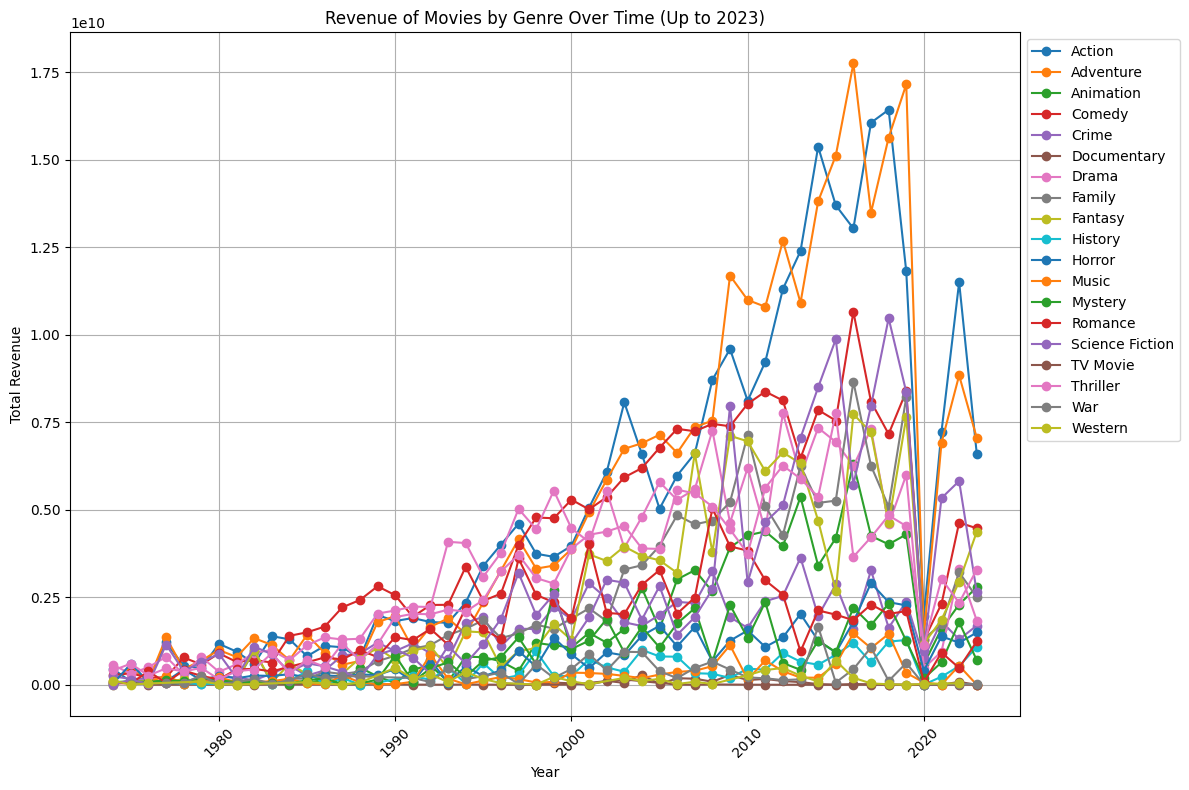

In [ ]:
import matplotlib.pyplot as plt

# Convert the release_date column to datetime, and remove timezone info (use tz_localize(None))
df_genres_separated['release_date'] = pd.to_datetime(df_genres_separated['release_date'], errors='coerce').dt.tz_localize(None)

# Set the cutoff date
cutoff_date = pd.to_datetime('2024-01-01')

# Filter the data to only include movies released before 01/01/2024
df_genres_separated = df_genres_separated[df_genres_separated['release_date'] < cutoff_date]

# Extract the year from the release_date column
df_genres_separated['release_year'] = df_genres_separated['release_date'].dt.year

# List of all genres to include
genres = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
          'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
          'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']

# Plot the revenue over time for each genre
plt.figure(figsize=(12, 8))

for genre in genres:
    # Filter and group by release year for each genre
    genre_revenue_by_year = df_genres_separated[df_genres_separated[genre] == 1].groupby('release_year')['revenue'].sum()

    # Plot each genre's revenue over time
    plt.plot(genre_revenue_by_year.index, genre_revenue_by_year.values, marker='o', label=genre)

# Set titles and labels
plt.title('Revenue of Movies by Genre Over Time (Up to 2023)')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Ensure layout is tight to avoid clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

## Exploring genre revenue

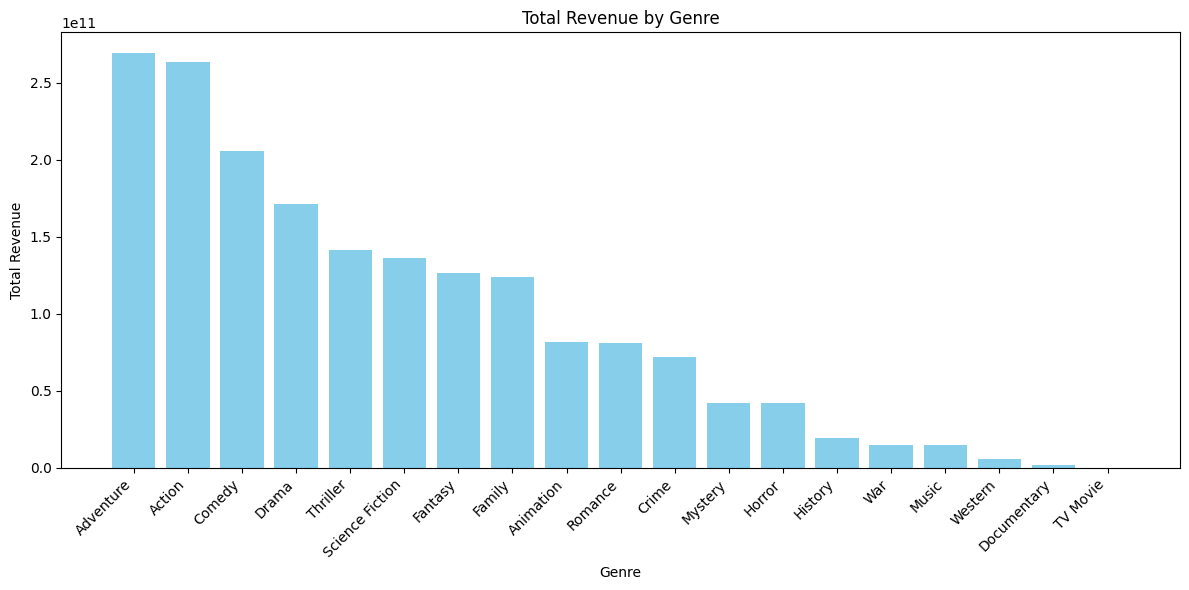

In [ ]:
import matplotlib.pyplot as plt

# List of the genre binary columns (assuming you have binary columns like 'Action', 'Comedy', etc.)
genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
                 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                 'TV Movie', 'Thriller', 'War', 'Western']

# Create a dictionary to store the total revenue per genre
genre_revenue = {}

# Loop through each genre column and calculate total revenue for that genre
for genre in genre_columns:
    # Multiply the binary column (1 or 0) by the revenue column, then sum to get total revenue for that genre
    total_revenue = (df_genres_separated[genre] * df_genres_separated['revenue']).sum()
    genre_revenue[genre] = total_revenue

# Convert the dictionary to a DataFrame for easier visualization
import pandas as pd
genre_revenue_df = pd.DataFrame(list(genre_revenue.items()), columns=['Genre', 'Total_Revenue'])

# Sort the DataFrame by total revenue
genre_revenue_df_sorted = genre_revenue_df.sort_values(by='Total_Revenue', ascending=False)

# Create a bar chart to visualize total revenue per genre
plt.figure(figsize=(12, 6))
plt.bar(genre_revenue_df_sorted['Genre'], genre_revenue_df_sorted['Total_Revenue'], color='skyblue')
plt.title('Total Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

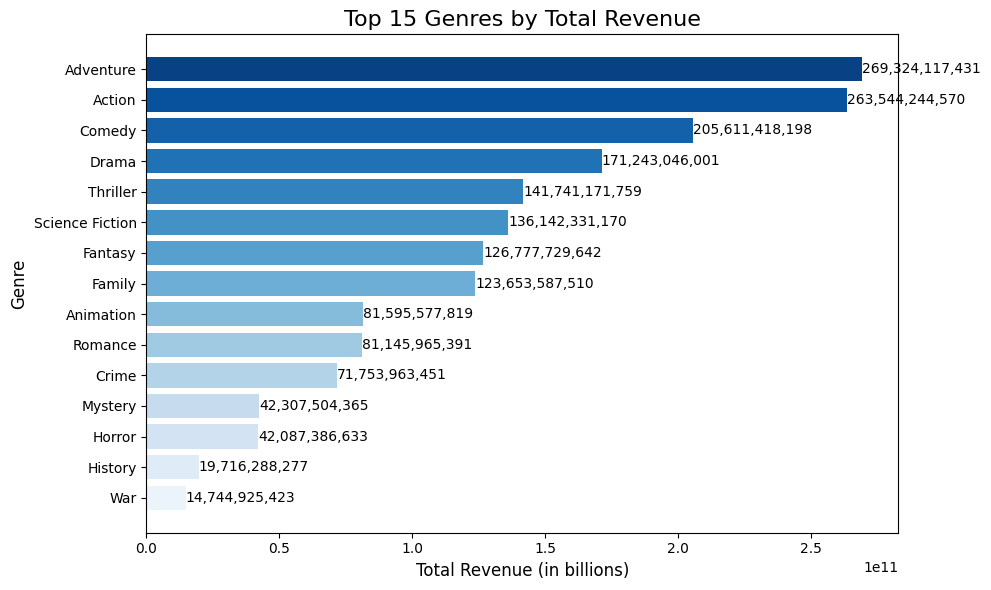

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by total revenue and limit to top 15 genres for clarity
genre_revenue_df_sorted = genre_revenue_df.sort_values(by='Total_Revenue', ascending=False).head(15)

# Set the color palette using Seaborn for better aesthetics
colors = sns.color_palette('Blues_r', len(genre_revenue_df_sorted))

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(genre_revenue_df_sorted['Genre'], genre_revenue_df_sorted['Total_Revenue'], color=colors)

# Add titles and labels
plt.title('Top 15 Genres by Total Revenue', fontsize=16)
plt.xlabel('Total Revenue (in billions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# Invert the y-axis to have the highest revenue genre at the top
plt.gca().invert_yaxis()

# Add revenue values to the right of the bars
for bar in bars:
    plt.text(bar.get_width() + 1e7, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width()):,}', va='center', fontsize=10)

# Improve layout
plt.tight_layout()
plt.show()

## Calculating total revenue/budget/profit for each genre

In [ ]:
project_id = 'movie-genre-analysis-le-wagon'

from google.colab import auth
auth.authenticate_user()
print('Authenticated')


from google.cloud import bigquery

client = bigquery.Client(project=project_id)

df_gb = client.query('''
  SELECT *
  FROM `movie-genre-analysis-le-wagon.TMDB.genres_as_binary` AS gb
''').to_dataframe()
df_gb

Authenticated


,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,...,Horror,Music,Mystery,Other,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,23592,In Enemy Hands (2005),5.830,94,2005-04-15 00:00:00+00:00,64236,94,5400000,en,7.706,...,0,0,0,0,0,0,0,0,1,0
1,184,Jackie Brown (1997),7.353,5824,1997-12-25 00:00:00+00:00,39673162,154,12000000,en,22.800,...,0,0,0,0,0,0,0,0,0,0
2,511322,The Good Liar (2019),6.687,1018,2019-11-08 00:00:00+00:00,33856058,109,10000000,en,12.392,...,0,0,0,0,0,0,0,0,0,0
3,524369,The Many Saints of Newark (2021),6.398,562,2021-09-22 00:00:00+00:00,13037403,120,50000000,en,19.667,...,0,0,0,0,0,0,0,0,0,0
4,4997,Wonderland (2003),6.034,238,2003-10-23 00:00:00+00:00,2466444,104,5000000,en,10.625,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,503736,Army of the Dead (2021),6.247,3638,2021-05-14 00:00:00+00:00,190700000,148,90000000,en,32.495,...,1,0,0,0,0,1,0,1,0,0
7219,1018494,Operation Seawolf (2022),5.900,86,2022-10-07 00:00:00+00:00,23000,86,15000,en,61.984,...,0,0,1,0,0,1,0,1,1,0
7220,803182,Moon Men (2017),10.000,2,2017-01-02 00:00:00+00:00,550,148,3,en,1.400,...,1,0,0,0,0,1,0,1,0,0
7221,2114,Final Fantasy: The Spirits Within (2001),6.173,1349,2001-07-02 00:00:00+00:00,85131830,106,137000000,en,15.894,...,0,0,0,0,1,1,0,1,0,0


In [ ]:
import pandas as pd

# Assuming df_gb is the original dataframe
df_gb = df_gb.copy()  # Make a copy just to be safe

# Define the genre columns
genre_columns = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure', 'Romance', 'Crime',
                 'Horror', 'Science Fiction', 'Family', 'Fantasy', 'Mystery', 'Animation',
                 'History', 'Music', 'War', 'Documentary', 'Western', 'Other']

# Create an empty dataframe to store the result
df_final = pd.DataFrame()

# Loop over each row in the original dataframe
for idx, row in df_gb.iterrows():
    # Get the genres where the movie has a 1 (i.e. belongs to that genre)
    genre_1s = row[genre_columns] == 1

    # If the movie belongs to multiple genres, duplicate the row for each genre
    for genre in genre_1s[genre_1s].index:
        # Create a copy of the row
        new_row = row.copy()

        # Set all genres to 0
        new_row[genre_columns] = 0

        # Set the current genre column to the revenue
        new_row[genre] = row['revenue']

        # Append this row to the final dataframe
        df_final = pd.concat([df_final, pd.DataFrame([new_row])])

# Reset the index of the final dataframe
df_final.reset_index(drop=True, inplace=True)

# Display the final dataframe
df_final.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,...,Horror,Music,Mystery,Other,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,23592,In Enemy Hands (2005),5.830,94,2005-04-15 00:00:00+00:00,64236,94,5400000,en,7.706,...,0,0,0,0,0,0,0,0,64236,0
1,184,Jackie Brown (1997),7.353,5824,1997-12-25 00:00:00+00:00,39673162,154,12000000,en,22.800,...,0,0,0,0,0,0,0,0,0,0
2,511322,The Good Liar (2019),6.687,1018,2019-11-08 00:00:00+00:00,33856058,109,10000000,en,12.392,...,0,0,0,0,0,0,0,0,0,0
3,524369,The Many Saints of Newark (2021),6.398,562,2021-09-22 00:00:00+00:00,13037403,120,50000000,en,19.667,...,0,0,0,0,0,0,0,0,0,0
4,4997,Wonderland (2003),6.034,238,2003-10-23 00:00:00+00:00,2466444,104,5000000,en,10.625,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = df_final
dataset_name = 'TMDB'
table_name = 'test_encoding'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 5526.09it/s]


In [ ]:
# Assuming df_gb is the original dataframe
df_gb = df_gb.copy()  # Make a copy just to be safe

# Define the genre columns
genre_columns = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure', 'Romance', 'Crime', 'Horror',
                 'Science Fiction', 'Family', 'Fantasy', 'Mystery', 'Animation', 'History',
                 'Music', 'War', 'Documentary', 'Western', 'Other']

# Create a copy of the dataframe
df_final = df_gb.copy()

# Loop over each genre column
for genre in genre_columns:
    # Multiply the revenue by the genre column values
    df_final[genre] = df_final[genre] * df_final['revenue']

# Display the final dataframe
df_final

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,...,Horror,Music,Mystery,Other,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,23592,In Enemy Hands (2005),5.830,94,2005-04-15 00:00:00+00:00,64236,94,5400000,en,7.706,...,0,0,0,0,0,0,0,0,64236,0
1,184,Jackie Brown (1997),7.353,5824,1997-12-25 00:00:00+00:00,39673162,154,12000000,en,22.800,...,0,0,0,0,0,0,0,0,0,0
2,511322,The Good Liar (2019),6.687,1018,2019-11-08 00:00:00+00:00,33856058,109,10000000,en,12.392,...,0,0,0,0,0,0,0,0,0,0
3,524369,The Many Saints of Newark (2021),6.398,562,2021-09-22 00:00:00+00:00,13037403,120,50000000,en,19.667,...,0,0,0,0,0,0,0,0,0,0
4,4997,Wonderland (2003),6.034,238,2003-10-23 00:00:00+00:00,2466444,104,5000000,en,10.625,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,503736,Army of the Dead (2021),6.247,3638,2021-05-14 00:00:00+00:00,190700000,148,90000000,en,32.495,...,190700000,0,0,0,0,190700000,0,190700000,0,0
7219,1018494,Operation Seawolf (2022),5.900,86,2022-10-07 00:00:00+00:00,23000,86,15000,en,61.984,...,0,0,23000,0,0,23000,0,23000,23000,0
7220,803182,Moon Men (2017),10.000,2,2017-01-02 00:00:00+00:00,550,148,3,en,1.400,...,550,0,0,0,0,550,0,550,0,0
7221,2114,Final Fantasy: The Spirits Within (2001),6.173,1349,2001-07-02 00:00:00+00:00,85131830,106,137000000,en,15.894,...,0,0,0,0,85131830,85131830,0,85131830,0,0


In [ ]:
# Use the dataframe loaded as df_ng in your Colab environment
df = df_ng

# Count the number of rows where 'runtime' is 0
zero_runtime_count = df[df['runtime'] == 0].shape[0]

# Output the result
print(f"There are {zero_runtime_count} rows with a runtime of 0.")

There are 32 rows with a runtime of 0.


## Fixing movies with a number of 2

In [ ]:
project_id = 'movie-genre-analysis-le-wagon'

from google.colab import auth
auth.authenticate_user()
print('Authenticated')


from google.cloud import bigquery

client = bigquery.Client(project=project_id)

df_cd = client.query('''
  SELECT *
  FROM `movie-genre-analysis-le-wagon.TMDB.cleaned_data` AS cd
''').to_dataframe()
df_cd

Authenticated


,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,...,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_count
0,23592,In Enemy Hands (2005),5.830,94,2005-04-15 00:00:00+00:00,64236,94,5400000,en,7.706,...,War,None,None,None,None,None,None,None,None,1
1,184,Jackie Brown (1997),7.353,5824,1997-12-25 00:00:00+00:00,39673162,154,12000000,en,22.800,...,Crime,None,None,None,None,None,None,None,None,1
2,511322,The Good Liar (2019),6.687,1018,2019-11-08 00:00:00+00:00,33856058,109,10000000,en,12.392,...,Crime,None,None,None,None,None,None,None,None,1
3,524369,The Many Saints of Newark (2021),6.398,562,2021-09-22 00:00:00+00:00,13037403,120,50000000,en,19.667,...,Crime,None,None,None,None,None,None,None,None,1
4,4997,Wonderland (2003),6.034,238,2003-10-23 00:00:00+00:00,2466444,104,5000000,en,10.625,...,Crime,None,None,None,None,None,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,1018494,Operation Seawolf (2022),5.900,86,2022-10-07 00:00:00+00:00,23000,86,15000,en,61.984,...,War,Thriller,Action,Adventure,Mystery,Science Fiction,Drama,None,None,7
7219,43475,Gumby: The Movie (1995),5.500,14,1995-10-04 00:00:00+00:00,57100,91,2800000,en,2.470,...,Fantasy,Animation,Family,Music,Adventure,Science Fiction,Western,None,None,7
7220,803182,Moon Men (2017),10.000,2,2017-01-02 00:00:00+00:00,550,148,3,en,1.400,...,Action,Adventure,Comedy,Documentary,Horror,Thriller,Science Fiction,None,None,7
7221,2114,Final Fantasy: The Spirits Within (2001),6.173,1349,2001-07-02 00:00:00+00:00,85131830,106,137000000,en,15.894,...,Adventure,Action,Fantasy,Science Fiction,Thriller,Romance,Animation,None,None,7


In [ ]:
titles_to_filter = ["Olivia's Cross (2012)", "WWR Widowmaker (2019)"]

# Filter the DataFrame
filtered_df = df_cd[df_cd['title'].isin(titles_to_filter)]

# Display the filtered DataFrame
print(filtered_df)

          id                  title  vote_average  vote_count  \
1365  602940  Olivia's Cross (2012)          10.0           1   
1366  587361  WWR Widowmaker (2019)          10.0           1   

                  release_date  revenue  runtime  budget original_language  \
1365 2012-09-06 00:00:00+00:00     3000       15    3000                en   
1366 2019-02-23 00:00:00+00:00     6000      109   11430                en   

      popularity  ... genre_0 genre_1 genre_2 genre_3 genre_4 genre_5 genre_6  \
1365       0.623  ...   Drama   Drama    None    None    None    None    None   
1366       0.600  ...   Drama   Drama    None    None    None    None    None   

     genre_7 genre_8 genre_count  
1365    None    None           2  
1366    None    None           2  

[2 rows x 23 columns]


In [ ]:
titles_to_filter = ["Olivia's Cross (2012)", "WWR Widowmaker (2019)"]

# Set 'Drama' in genre_0 for the specified titles and clear genre_1
df_cd.loc[df_cd['title'].isin(titles_to_filter), 'genre_0'] = 'Drama'
df_cd.loc[df_cd['title'].isin(titles_to_filter), 'genre_1'] = None  # Clear genre_1

# Display the modified DataFrame
print(df_cd[df_cd['title'].isin(titles_to_filter)])

          id                  title  vote_average  vote_count  \
1365  602940  Olivia's Cross (2012)          10.0           1   
1366  587361  WWR Widowmaker (2019)          10.0           1   

                  release_date  revenue  runtime  budget original_language  \
1365 2012-09-06 00:00:00+00:00     3000       15    3000                en   
1366 2019-02-23 00:00:00+00:00     6000      109   11430                en   

      popularity  ... genre_0 genre_1 genre_2 genre_3 genre_4 genre_5 genre_6  \
1365       0.623  ...   Drama    None    None    None    None    None    None   
1366       0.600  ...   Drama    None    None    None    None    None    None   

     genre_7 genre_8 genre_count  
1365    None    None           2  
1366    None    None           2  

[2 rows x 23 columns]


## Checking movies with a 2 are gone

In [ ]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = df_cd
dataset_name = 'fixed_tables'
table_name = 'fixed_clean_data'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 716.49it/s]


In [ ]:
df_cd_copy = df_cd.copy()

# List of genres to encode as binary columns
genres_list = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
               'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Other',
               'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'TV Movie']

# Create binary columns for each genre
for genre in genres_list:
    df_cd_copy[genre] = df_cd_copy['genres'].apply(lambda x: 1 if genre in x else 0)

# Display the DataFrame with the new binary genre columns
print(df_cd_copy)

           id                                     title  vote_average  \
0       23592                     In Enemy Hands (2005)         5.830   
1         184                       Jackie Brown (1997)         7.353   
2      511322                      The Good Liar (2019)         6.687   
3      524369          The Many Saints of Newark (2021)         6.398   
4        4997                         Wonderland (2003)         6.034   
...       ...                                       ...           ...   
7218  1018494                  Operation Seawolf (2022)         5.900   
7219    43475                   Gumby: The Movie (1995)         5.500   
7220   803182                           Moon Men (2017)        10.000   
7221     2114  Final Fantasy: The Spirits Within (2001)         6.173   
7222   936252                     Privacy Breach (2020)        10.000   

      vote_count              release_date   revenue  runtime     budget  \
0             94 2005-04-15 00:00:00+00:00     

In [ ]:
genres_list = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
               'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Other',
               'Romance', 'Science Fiction', 'Thriller', 'War', 'Western', 'TV Movie']

# Check for any value >= 2 in the specified genre columns
# Create a mask that checks if any of the genre columns have a value >= 2
mask = (df_cd_copy[genres_list] >= 2).any(axis=1)

# Get titles of movies with any genre value >= 2
movies_with_invalid_genres = df_cd_copy[mask]

# Display the results
if not movies_with_invalid_genres.empty:
    print("Movies with genre values >= 2:")
    print(movies_with_invalid_genres[['title'] + genres_list])
else:
    print("No movies with genre values >= 2 found.")

No movies with genre values >= 2 found.


## Cleaning up some of our data sets

In [ ]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = df_cd_copy
dataset_name = 'fixed_tables'
table_name = 'fixed_binary'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 6123.07it/s]


In [ ]:
columns_to_drop = ['genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4',
                   'genre_5', 'genre_6', 'genre_7', 'genre_8', 'genre_count']
df_dropped = df_cd_copy.drop(columns=columns_to_drop)

# Display the DataFrame after dropping the columns
print(df_dropped)

           id                                     title  vote_average  \
0       23592                     In Enemy Hands (2005)         5.830   
1         184                       Jackie Brown (1997)         7.353   
2      511322                      The Good Liar (2019)         6.687   
3      524369          The Many Saints of Newark (2021)         6.398   
4        4997                         Wonderland (2003)         6.034   
...       ...                                       ...           ...   
7218  1018494                  Operation Seawolf (2022)         5.900   
7219    43475                   Gumby: The Movie (1995)         5.500   
7220   803182                           Moon Men (2017)        10.000   
7221     2114  Final Fantasy: The Spirits Within (2001)         6.173   
7222   936252                     Privacy Breach (2020)        10.000   

      vote_count              release_date   revenue  runtime     budget  \
0             94 2005-04-15 00:00:00+00:00     

In [ ]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = df_dropped
dataset_name = 'fixed_tables'
table_name = 'fixed_binary'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 1523.54it/s]


In [ ]:
# Assuming df_gb is the original dataframe
df_gb = df_dropped.copy()  # Make a copy just to be safe

# Define the genre columns
genre_columns = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure', 'Romance', 'Crime', 'Horror',
                 'Science Fiction', 'Family', 'Fantasy', 'Mystery', 'Animation', 'History',
                 'Music', 'War', 'Documentary', 'Western', 'Other', 'TV Movie']

# Create a copy of the dataframe
df_final = df_gb.copy()

# Loop over each genre column
for genre in genre_columns:
    # Multiply the revenue by the genre column values
    df_final[genre] = df_final[genre] * df_final['revenue']

# Display the final dataframe
df_final

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,...,Horror,Music,Mystery,Other,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,23592,In Enemy Hands (2005),5.830,94,2005-04-15 00:00:00+00:00,64236,94,5400000,en,7.706,...,0,0,0,0,0,0,0,0,64236,0
1,184,Jackie Brown (1997),7.353,5824,1997-12-25 00:00:00+00:00,39673162,154,12000000,en,22.800,...,0,0,0,0,0,0,0,0,0,0
2,511322,The Good Liar (2019),6.687,1018,2019-11-08 00:00:00+00:00,33856058,109,10000000,en,12.392,...,0,0,0,0,0,0,0,0,0,0
3,524369,The Many Saints of Newark (2021),6.398,562,2021-09-22 00:00:00+00:00,13037403,120,50000000,en,19.667,...,0,0,0,0,0,0,0,0,0,0
4,4997,Wonderland (2003),6.034,238,2003-10-23 00:00:00+00:00,2466444,104,5000000,en,10.625,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,1018494,Operation Seawolf (2022),5.900,86,2022-10-07 00:00:00+00:00,23000,86,15000,en,61.984,...,0,0,23000,0,0,23000,0,23000,23000,0
7219,43475,Gumby: The Movie (1995),5.500,14,1995-10-04 00:00:00+00:00,57100,91,2800000,en,2.470,...,0,57100,0,0,0,57100,0,0,0,57100
7220,803182,Moon Men (2017),10.000,2,2017-01-02 00:00:00+00:00,550,148,3,en,1.400,...,550,0,0,0,0,550,0,550,0,0
7221,2114,Final Fantasy: The Spirits Within (2001),6.173,1349,2001-07-02 00:00:00+00:00,85131830,106,137000000,en,15.894,...,0,0,0,0,85131830,85131830,0,85131830,0,0


In [ ]:
import pandas as pd

# Assuming df_gb is the DataFrame after dropping unnecessary columns
df_gb = df_dropped.copy()  # Make a copy just to be safe

# Define the genre columns
genre_columns = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure', 'Romance', 'Crime',
                 'Horror', 'Science Fiction', 'Family', 'Fantasy', 'Mystery', 'Animation',
                 'History', 'Music', 'War', 'Documentary', 'Western', 'Other', 'TV Movie']

# Create an empty DataFrame to store the result
df_final = pd.DataFrame()

# Loop over each row in the original DataFrame
for idx, row in df_gb.iterrows():
    # Loop over each genre column
    for genre in genre_columns:
        # Check if the genre value is greater than 0
        if row[genre] > 0:
            # Create a new row with the current genre's revenue
            new_row = row.copy()  # Copy the current row
            new_row[genre] = row['revenue']  # Set the current genre column to the revenue

            # Set all other genre columns to 0
            for col in genre_columns:
                if col != genre:
                    new_row[col] = 0

            # Append the new row to the final DataFrame
            df_final = pd.concat([df_final, pd.DataFrame([new_row])], ignore_index=True)

# Reset the index of the final DataFrame
df_final.reset_index(drop=True, inplace=True)

# Display the final DataFrame
print(df_final.head())

       id                             title  vote_average  vote_count  \
0   23592             In Enemy Hands (2005)         5.830          94   
1     184               Jackie Brown (1997)         7.353        5824   
2  511322              The Good Liar (2019)         6.687        1018   
3  524369  The Many Saints of Newark (2021)         6.398         562   
4    4997                 Wonderland (2003)         6.034         238   

               release_date   revenue  runtime    budget original_language  \
0 2005-04-15 00:00:00+00:00     64236       94   5400000                en   
1 1997-12-25 00:00:00+00:00  39673162      154  12000000                en   
2 2019-11-08 00:00:00+00:00  33856058      109  10000000                en   
3 2021-09-22 00:00:00+00:00  13037403      120  50000000                en   
4 2003-10-23 00:00:00+00:00   2466444      104   5000000                en   

   popularity  ... Horror Music Mystery  Other  Romance  Science Fiction  \
0       7.706  .

In [ ]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = df_final
dataset_name = 'aggregated_tables'
table_name = 'revenue_per_genre'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 767.48it/s]


## FRIDAY 10/18

## Continuing calculating total revenue/budget/profit per genre

In [ ]:
project_id = 'movie-genre-analysis-le-wagon'

from google.colab import auth
auth.authenticate_user()
print('Authenticated')


from google.cloud import bigquery

client = bigquery.Client(project=project_id)

df_rpg = client.query('''
  SELECT *
  FROM `movie-genre-analysis-le-wagon.aggregated_tables.revenue_per_genre` AS rpg
''').to_dataframe()
df_rpg

Authenticated


,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,...,Horror,Music,Mystery,Other,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,590034,Ithu Kollam (2017),10.000,1,2017-11-23 00:00:00+00:00,1200,0,1000,en,0.600,...,0,1200,0,0,0,0,0,0,0,0
1,598905,Stardom Cinderella Tournament (2015),8.000,1,2015-04-23 00:00:00+00:00,15666,0,7334,en,1.137,...,0,0,0,0,0,0,0,0,0,0
2,402557,Paths of the Gods (1995),9.000,1,1995-02-17 00:00:00+00:00,4000000,0,1000000,en,0.663,...,0,0,0,0,0,0,0,0,0,0
3,335207,Like a butterfly (2013),8.000,1,2013-03-10 00:00:00+00:00,90000,0,70000,en,0.624,...,0,0,0,0,0,0,0,0,0,0
4,1357861,Superheroes: The Down of a New Fascist Era (2024),10.000,1,2024-09-16 00:00:00+00:00,5,0,5,en,1.400,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18309,752,V for Vendetta (2006),7.897,13556,2006-02-23 00:00:00+00:00,132511035,132,54000000,en,42.174,...,0,0,0,0,0,132511035,0,0,0,0
18310,7459,Speed Racer (2008),6.254,1406,2008-05-07 00:00:00+00:00,93945766,135,120000000,en,21.939,...,0,0,0,0,0,0,0,0,0,0
18311,7459,Speed Racer (2008),6.254,1406,2008-05-07 00:00:00+00:00,93945766,135,120000000,en,21.939,...,0,0,0,0,0,0,0,0,0,0
18312,7459,Speed Racer (2008),6.254,1406,2008-05-07 00:00:00+00:00,93945766,135,120000000,en,21.939,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_release = df_rpg.copy()

# First, ensure that the 'release_date' column is a datetime type
df_release['release_date'] = pd.to_datetime(df_release['release_date'])

# Extract the year from the 'release_date' column
df_release['year'] = df_release['release_date'].dt.year

# Define the genre columns
genre_columns = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure', 'Romance', 'Crime',
                 'Horror', 'Science Fiction', 'Family', 'Fantasy', 'Mystery', 'Animation',
                 'History', 'Music', 'War', 'Documentary', 'Western', 'Other', 'TV Movie']

# Group by 'year' and sum the revenue for each genre
df_grouped_by_year = df_release.groupby('year')[genre_columns].sum().reset_index()

# Display the resulting DataFrame
print(df_grouped_by_year)



    year       Drama       Comedy    Thriller       Action    Adventure  \
0   1974   567327928    278381408   411791653    447038653    102172000   
1   1975   310624503    326073297   602303097     88484444    488606584   
2   1976   502650044    201782507   262057217    107236000    110701445   
3   1977   796331649    211188494   468410687   1209478289   1350727831   
4   1978   294490743    779513337   381376362    536598652    447879447   
5   1979   796045605    576512852   480802574    474321727    690161820   
6   1980   369021082    897206480   154985992   1168442532    992721266   
7   1981   583654587    653138879   388152105    946874302    792743335   
8   1982   913763865    707075268   434886051    595342794   1329841943   
9   1983   992067423    634761953   904397351   1386681379   1138780457   
10  1984   698686215   1397666889   332337892   1299243927    701770750   
11  1985  1128892341   1498640876   704753843    814628239   1426530279   
12  1986  1352633782   16

In [ ]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = df_grouped_by_year
dataset_name = 'aggregated_tables'
table_name = 'revenue_grouped_by_year'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 7516.67it/s]


In [ ]:
df_final = df_rpg.copy()  # Copying just to be safe

# Define the genre columns
genre_columns = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure', 'Romance', 'Crime',
                 'Horror', 'Science Fiction', 'Family', 'Fantasy', 'Mystery', 'Animation',
                 'History', 'Music', 'War', 'Documentary', 'Western', 'Other', 'TV Movie']

# Sum the values in each genre column to get total revenue per genre
total_revenue_per_genre = df_final[genre_columns].sum()

# Display the result
total_revenue_per_genre

,0
Drama,171984634928
Comedy,206131418980
Thriller,141741174221
Action,263544247157
Adventure,269324117449
Romance,81366562957
Crime,71753965890
Horror,42092431146
Science Fiction,136142331170
Family,124173588099


In [ ]:
# Convert the Series (total_revenue_per_genre) to a DataFrame
total_revenue_df = total_revenue_per_genre.reset_index()

# Rename the columns for better clarity
total_revenue_df.columns = ['Genre', 'Total_Revenue']

# Display the resulting DataFrame
print(total_revenue_df)

              Genre  Total_Revenue
0             Drama   171984634928
1            Comedy   206131418980
2          Thriller   141741174221
3            Action   263544247157
4         Adventure   269324117449
5           Romance    81366562957
6             Crime    71753965890
7            Horror    42092431146
8   Science Fiction   136142331170
9            Family   124173588099
10          Fantasy   127297729842
11          Mystery    42307504383
12        Animation    81595577819
13          History    19936885375
14            Music    14645140002
15              War    14965522521
16      Documentary     1947923453
17          Western     5582555149
18            Other      231676370
19         TV Movie      214043566


In [ ]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = total_revenue_df
dataset_name = 'aggregated_tables'
table_name = 'total_revenue_per_each_genre'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 1879.17it/s]


## PROFIT

In [ ]:
df_margin = df_rpg.copy()

genre_columns = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure', 'Romance', 'Crime',
                 'Horror', 'Science Fiction', 'Family', 'Fantasy', 'Mystery', 'Animation',
                 'History', 'Music', 'War', 'Documentary', 'Western', 'Other', 'TV Movie']

# Sum the revenue values for each genre
total_revenue_per_genre = df_final[genre_columns].sum()

# Sum the budget values for each genre (assuming the same genre columns are used for budget)
df_final_budget = df_final.copy()

for genre in genre_columns:
    df_final_budget[genre] = df_final_budget[genre] * df_final_budget['budget']

# Sum the budget values for each genre
total_budget_per_genre = df_final_budget[genre_columns].sum()

# Combine both into a DataFrame for better display
summary_df = pd.DataFrame({
    'Total_Revenue': total_revenue_per_genre,
    'Total_Budget': total_budget_per_genre
})

# Reset the index and rename the genre column
summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Genre'}, inplace=True)

# Sort by Total_Revenue in descending order
summary_df.sort_values(by='Total_Revenue', ascending=False, inplace=True)

# Display the result
summary_df

,Genre,Total_Revenue,Total_Budget
4,Adventure,269324117449,1181406241039796461
3,Action,263544247157,-1511417765126671425
1,Comedy,206131418980,-4557221671790314882
0,Drama,171984634928,-7907627859543380029
2,Thriller,141741174221,-7332029214568888344
8,Science Fiction,136142331170,1576962419125802041
10,Fantasy,127297729842,-2110600707508386013
9,Family,124173588099,-5200183007565107156
12,Animation,81595577819,9072900305240212928
5,Romance,81366562957,4547067408186850894


In [ ]:
project_id = 'movie-genre-analysis-le-wagon'

from google.colab import auth
auth.authenticate_user()
print('Authenticated')


from google.cloud import bigquery

client = bigquery.Client(project=project_id)

df_binary = client.query('''
  SELECT *
  FROM `movie-genre-analysis-le-wagon.fixed_tables.fixed_binary` AS rpg
''').to_dataframe()
df_binary

Authenticated


,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,...,Horror,Music,Mystery,Other,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,23592,In Enemy Hands (2005),5.830,94,2005-04-15 00:00:00+00:00,64236,94,5400000,en,7.706,...,0,0,0,0,0,0,0,0,1,0
1,184,Jackie Brown (1997),7.353,5824,1997-12-25 00:00:00+00:00,39673162,154,12000000,en,22.800,...,0,0,0,0,0,0,0,0,0,0
2,511322,The Good Liar (2019),6.687,1018,2019-11-08 00:00:00+00:00,33856058,109,10000000,en,12.392,...,0,0,0,0,0,0,0,0,0,0
3,524369,The Many Saints of Newark (2021),6.398,562,2021-09-22 00:00:00+00:00,13037403,120,50000000,en,19.667,...,0,0,0,0,0,0,0,0,0,0
4,4997,Wonderland (2003),6.034,238,2003-10-23 00:00:00+00:00,2466444,104,5000000,en,10.625,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,503736,Army of the Dead (2021),6.247,3638,2021-05-14 00:00:00+00:00,190700000,148,90000000,en,32.495,...,1,0,0,0,0,1,0,1,0,0
7219,1018494,Operation Seawolf (2022),5.900,86,2022-10-07 00:00:00+00:00,23000,86,15000,en,61.984,...,0,0,1,0,0,1,0,1,1,0
7220,803182,Moon Men (2017),10.000,2,2017-01-02 00:00:00+00:00,550,148,3,en,1.400,...,1,0,0,0,0,1,0,1,0,0
7221,2114,Final Fantasy: The Spirits Within (2001),6.173,1349,2001-07-02 00:00:00+00:00,85131830,106,137000000,en,15.894,...,0,0,0,0,1,1,0,1,0,0


In [ ]:
# Define the genre columns
genre_columns = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure', 'Romance', 'Crime', 'Horror',
                 'Science Fiction', 'Family', 'Fantasy', 'Mystery', 'Animation', 'History',
                 'Music', 'War', 'Documentary', 'Western', 'Other', 'TV Movie']

# Create a copy of the dataframe
df_final = df_binary.copy()

# Loop over each genre column
for genre in genre_columns:
    # Multiply the revenue by the genre column values
    df_final[genre] = df_final[genre] * df_final['budget']

# Display the final dataframe
df_final

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,...,Horror,Music,Mystery,Other,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,23592,In Enemy Hands (2005),5.830,94,2005-04-15 00:00:00+00:00,64236,94,5400000,en,7.706,...,0,0,0,0,0,0,0,0,5400000,0
1,184,Jackie Brown (1997),7.353,5824,1997-12-25 00:00:00+00:00,39673162,154,12000000,en,22.800,...,0,0,0,0,0,0,0,0,0,0
2,511322,The Good Liar (2019),6.687,1018,2019-11-08 00:00:00+00:00,33856058,109,10000000,en,12.392,...,0,0,0,0,0,0,0,0,0,0
3,524369,The Many Saints of Newark (2021),6.398,562,2021-09-22 00:00:00+00:00,13037403,120,50000000,en,19.667,...,0,0,0,0,0,0,0,0,0,0
4,4997,Wonderland (2003),6.034,238,2003-10-23 00:00:00+00:00,2466444,104,5000000,en,10.625,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,503736,Army of the Dead (2021),6.247,3638,2021-05-14 00:00:00+00:00,190700000,148,90000000,en,32.495,...,90000000,0,0,0,0,90000000,0,90000000,0,0
7219,1018494,Operation Seawolf (2022),5.900,86,2022-10-07 00:00:00+00:00,23000,86,15000,en,61.984,...,0,0,15000,0,0,15000,0,15000,15000,0
7220,803182,Moon Men (2017),10.000,2,2017-01-02 00:00:00+00:00,550,148,3,en,1.400,...,3,0,0,0,0,3,0,3,0,0
7221,2114,Final Fantasy: The Spirits Within (2001),6.173,1349,2001-07-02 00:00:00+00:00,85131830,106,137000000,en,15.894,...,0,0,0,0,137000000,137000000,0,137000000,0,0


In [ ]:
 # Copying just to be safe

# Define the genre columns
genre_columns = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure', 'Romance', 'Crime',
                 'Horror', 'Science Fiction', 'Family', 'Fantasy', 'Mystery', 'Animation',
                 'History', 'Music', 'War', 'Documentary', 'Western', 'Other', 'TV Movie']

# Sum the values in each genre column to get total revenue per genre
total_budget_per_genre = df_final[genre_columns].sum()

# Display the result
total_budget_per_genre

,0
Drama,70823485417
Comedy,72513255894
Thriller,57275124437
Action,95303396258
Adventure,85683489854
Romance,28070810742
Crime,30994100390
Horror,13894974261
Science Fiction,46570703045
Family,40708102954


In [ ]:
# Convert the Series (total_revenue_per_genre) to a DataFrame
total_budget_df = total_budget_per_genre.reset_index()

# Rename the columns for better clarity
total_budget_df.columns = ['Genre', 'Total_Budget']

# Display the resulting DataFrame
print(total_budget_df)


              Genre  Total_Budget
0             Drama   70823485417
1            Comedy   72513255894
2          Thriller   57275124437
3            Action   95303396258
4         Adventure   85683489854
5           Romance   28070810742
6             Crime   30994100390
7            Horror   13894974261
8   Science Fiction   46570703045
9            Family   40708102954
10          Fantasy   42353737972
11          Mystery   16800786090
12        Animation   24688088041
13          History   10486877195
14            Music    4918491187
15              War    7425535521
16      Documentary     429099367
17          Western    3076322911
18            Other      61514250
19         TV Movie      47030539


In [ ]:
merged_df = pd.merge(total_revenue_df, total_budget_df, on='Genre')

# Display the merged DataFrame
print("Merged DataFrame:")
print(merged_df)

Merged DataFrame:
              Genre  Total_Revenue  Total_Budget
0             Drama   171984634928   70823485417
1            Comedy   206131418980   72513255894
2          Thriller   141741174221   57275124437
3            Action   263544247157   95303396258
4         Adventure   269324117449   85683489854
5           Romance    81366562957   28070810742
6             Crime    71753965890   30994100390
7            Horror    42092431146   13894974261
8   Science Fiction   136142331170   46570703045
9            Family   124173588099   40708102954
10          Fantasy   127297729842   42353737972
11          Mystery    42307504383   16800786090
12        Animation    81595577819   24688088041
13          History    19936885375   10486877195
14            Music    14645140002    4918491187
15              War    14965522521    7425535521
16      Documentary     1947923453     429099367
17          Western     5582555149    3076322911
18            Other      231676370      61514250
19

In [ ]:
merged_df['Profit'] = merged_df['Total_Revenue'] - merged_df['Total_Budget']

# Sort by Profit in descending order
sorted_df = merged_df.sort_values(by='Profit', ascending=False)

# Display the merged DataFrame with Profit
print("Merged DataFrame with Profit:")
print(sorted_df)

Merged DataFrame with Profit:
              Genre  Total_Revenue  Total_Budget        Profit
4         Adventure   269324117449   85683489854  183640627595
3            Action   263544247157   95303396258  168240850899
1            Comedy   206131418980   72513255894  133618163086
0             Drama   171984634928   70823485417  101161149511
8   Science Fiction   136142331170   46570703045   89571628125
10          Fantasy   127297729842   42353737972   84943991870
2          Thriller   141741174221   57275124437   84466049784
9            Family   124173588099   40708102954   83465485145
12        Animation    81595577819   24688088041   56907489778
5           Romance    81366562957   28070810742   53295752215
6             Crime    71753965890   30994100390   40759865500
7            Horror    42092431146   13894974261   28197456885
11          Mystery    42307504383   16800786090   25506718293
14            Music    14645140002    4918491187    9726648815
13          History    19

In [ ]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = sorted_df
dataset_name = 'aggregated_tables'
table_name = 'profit'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 1577.40it/s]


In [ ]:
project_id = 'movie-genre-analysis-le-wagon'

from google.colab import auth
auth.authenticate_user()
print('Authenticated')

from google.cloud import bigquery

client = bigquery.Client(project=project_id)

df_fixed= client.query('''
  SELECT *
  FROM `movie-genre-analysis-le-wagon.fixed_tables.fixed_clean_data` AS fixed
''').to_dataframe()
df_fixed

Authenticated


,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,...,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_count
0,23592,In Enemy Hands (2005),5.830,94,2005-04-15 00:00:00+00:00,64236,94,5400000,en,7.706,...,War,None,None,None,None,None,None,None,None,1
1,184,Jackie Brown (1997),7.353,5824,1997-12-25 00:00:00+00:00,39673162,154,12000000,en,22.800,...,Crime,None,None,None,None,None,None,None,None,1
2,511322,The Good Liar (2019),6.687,1018,2019-11-08 00:00:00+00:00,33856058,109,10000000,en,12.392,...,Crime,None,None,None,None,None,None,None,None,1
3,524369,The Many Saints of Newark (2021),6.398,562,2021-09-22 00:00:00+00:00,13037403,120,50000000,en,19.667,...,Crime,None,None,None,None,None,None,None,None,1
4,4997,Wonderland (2003),6.034,238,2003-10-23 00:00:00+00:00,2466444,104,5000000,en,10.625,...,Crime,None,None,None,None,None,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,15268,Street Fighter: The Legend of Chun-Li (2009),4.385,410,2009-02-27 00:00:00+00:00,12764201,97,50000000,en,16.596,...,Action,Adventure,Science Fiction,Thriller,None,None,None,None,None,4
7219,10640,Futureworld (1976),5.917,277,1976-08-13 00:00:00+00:00,4200000,108,2500000,en,16.170,...,Action,Adventure,Science Fiction,Thriller,None,None,None,None,None,4
7220,24746,Six-String Samurai (1998),6.129,116,1998-09-18 00:00:00+00:00,124494,91,2000000,en,8.856,...,Action,Adventure,Science Fiction,Music,Comedy,None,None,None,None,5
7221,10386,The Iron Giant (1999),7.925,5105,1999-08-06 00:00:00+00:00,23159305,86,70000000,en,41.390,...,Family,Animation,Science Fiction,Drama,None,None,None,None,None,4


## I decided I wanted to create one single 'genre' column where each row is duplicated and displays a single genre each time

In [ ]:
df_fixed['genres'] = df_fixed['genres'].str.split(', ')
df_fixed_exploded = df_fixed.explode('genres')

# Rename the 'genres' column to 'genre'
df_fixed_exploded.rename(columns={'genres': 'genre'}, inplace=True)

# Display the resulting DataFrame
print("\nDataFrame after separating genres:")
print(df_fixed_exploded)


DataFrame after separating genres:
          id                             title  vote_average  vote_count  \
0      23592             In Enemy Hands (2005)         5.830          94   
1        184               Jackie Brown (1997)         7.353        5824   
2     511322              The Good Liar (2019)         6.687        1018   
3     524369  The Many Saints of Newark (2021)         6.398         562   
4       4997                 Wonderland (2003)         6.034         238   
...      ...                               ...           ...         ...   
7221   10386             The Iron Giant (1999)         7.925        5105   
7222   35614    A Troll in Central Park (1994)         5.077         130   
7222   35614    A Troll in Central Park (1994)         5.077         130   
7222   35614    A Troll in Central Park (1994)         5.077         130   
7222   35614    A Troll in Central Park (1994)         5.077         130   

                  release_date   revenue  runtime  

In [ ]:
print(df_fixed_exploded[['title', 'genre']])

                                 title            genre
0                In Enemy Hands (2005)              War
1                  Jackie Brown (1997)            Crime
2                 The Good Liar (2019)            Crime
3     The Many Saints of Newark (2021)            Crime
4                    Wonderland (2003)            Crime
...                                ...              ...
7221             The Iron Giant (1999)            Drama
7222    A Troll in Central Park (1994)          Fantasy
7222    A Troll in Central Park (1994)        Animation
7222    A Troll in Central Park (1994)  Science Fiction
7222    A Troll in Central Park (1994)           Family

[18316 rows x 2 columns]


In [ ]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = df_fixed_exploded
dataset_name = 'aggregated_tables'
table_name = 'movies_per_genre_fixed'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 1561.54it/s]


## creating a table with total genre revenue, budget and profit


In [ ]:
project_id = 'movie-genre-analysis-le-wagon'

from google.colab import auth
auth.authenticate_user()
print('Authenticated')

from google.cloud import bigquery

client = bigquery.Client(project=project_id)

df_vis = client.query('''
  SELECT *
  FROM `movie-genre-analysis-le-wagon.fixed_tables.fixed_clean_data` AS fixed
''').to_dataframe()
df_vis

Authenticated


,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,...,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_count
0,23592,In Enemy Hands (2005),5.830,94,2005-04-15 00:00:00+00:00,64236,94,5400000,en,7.706,...,War,None,None,None,None,None,None,None,None,1
1,184,Jackie Brown (1997),7.353,5824,1997-12-25 00:00:00+00:00,39673162,154,12000000,en,22.800,...,Crime,None,None,None,None,None,None,None,None,1
2,511322,The Good Liar (2019),6.687,1018,2019-11-08 00:00:00+00:00,33856058,109,10000000,en,12.392,...,Crime,None,None,None,None,None,None,None,None,1
3,524369,The Many Saints of Newark (2021),6.398,562,2021-09-22 00:00:00+00:00,13037403,120,50000000,en,19.667,...,Crime,None,None,None,None,None,None,None,None,1
4,4997,Wonderland (2003),6.034,238,2003-10-23 00:00:00+00:00,2466444,104,5000000,en,10.625,...,Crime,None,None,None,None,None,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,15268,Street Fighter: The Legend of Chun-Li (2009),4.385,410,2009-02-27 00:00:00+00:00,12764201,97,50000000,en,16.596,...,Action,Adventure,Science Fiction,Thriller,None,None,None,None,None,4
7219,10640,Futureworld (1976),5.917,277,1976-08-13 00:00:00+00:00,4200000,108,2500000,en,16.170,...,Action,Adventure,Science Fiction,Thriller,None,None,None,None,None,4
7220,24746,Six-String Samurai (1998),6.129,116,1998-09-18 00:00:00+00:00,124494,91,2000000,en,8.856,...,Action,Adventure,Science Fiction,Music,Comedy,None,None,None,None,5
7221,10386,The Iron Giant (1999),7.925,5105,1999-08-06 00:00:00+00:00,23159305,86,70000000,en,41.390,...,Family,Animation,Science Fiction,Drama,None,None,None,None,None,4


In [ ]:
# Define the list of genres
genre_list = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure',
              'Romance', 'Crime', 'Horror', 'Science Fiction',
              'Family', 'Fantasy', 'Mystery', 'Animation',
              'History', 'Music', 'War', 'Documentary',
              'Western', 'Other', 'TV Movie']

# Step 1: Calculate total budget per genre
df_genres_budget = df_vis.copy()

# Split the 'genres' column into individual genres
df_genres_budget['genres'] = df_genres_budget['genres'].str.split(',')

# Explode the list of genres into individual rows
df_genres_budget = df_genres_budget.explode('genres')

# Strip any leading/trailing whitespace from genre names
df_genres_budget['genres'] = df_genres_budget['genres'].str.strip()

# Filter the exploded DataFrame to only include genres from the provided list
df_filtered_budget = df_genres_budget[df_genres_budget['genres'].isin(genre_list)]

# Step 2: Calculate total budget per genre
total_budget_per_genre = df_filtered_budget.groupby('genres')['budget'].sum().reset_index()

# Step 3: Calculate the average budget per genre (total budget / count of movies per genre)
total_movies_per_genre = df_filtered_budget.groupby('genres')['budget'].count().reset_index()
total_movies_per_genre.columns = ['Genre', 'Movie_Count']

average_budget_per_genre = total_budget_per_genre.merge(total_movies_per_genre, left_on='genres', right_on='Genre')
average_budget_per_genre['Average_Budget'] = average_budget_per_genre['budget'] / average_budget_per_genre['Movie_Count']

# Rename for clarity
average_budget_per_genre = average_budget_per_genre[['Genre', 'Average_Budget']]

# Step 4: Now calculate total revenue and total budget for each genre for profit
total_revenue_budget_per_genre = df_filtered_budget.groupby('genres').agg({
    'budget': 'sum',
    'revenue': 'sum'
}).reset_index()

# Step 5: Calculate total profit per genre (total revenue - total budget)
total_revenue_budget_per_genre['Total_Profit'] = total_revenue_budget_per_genre['revenue'] - total_revenue_budget_per_genre['budget']

# Step 6: Calculate average profit per genre (total profit / count of movies per genre)
average_profit_per_genre = total_revenue_budget_per_genre.merge(total_movies_per_genre, left_on='genres', right_on='Genre')
average_profit_per_genre['Average_Profit'] = average_profit_per_genre['Total_Profit'] / average_profit_per_genre['Movie_Count']

# Rename for clarity
average_profit_per_genre = average_profit_per_genre[['Genre', 'Average_Profit']]

# Step 7: Merge average budget and average profit into a single DataFrame
final_df = average_budget_per_genre.merge(average_profit_per_genre, on='Genre')

# Step 8: Sort by average budget or average profit (optional)
final_df_sorted = final_df.sort_values(by='Average_Budget', ascending=False)

# Display final DataFrame with Genre, Average Budget, and Average Profit
print("Final DataFrame with Genre, Average Budget, and Average Profit:")
print(final_df_sorted)


Final DataFrame with Genre, Average Budget, and Average Profit:
              Genre   Average_Budget    Average_Profit
1         Adventure  69099588.591935  148097280.318548
2         Animation  63465521.956298  146291747.501285
8           Fantasy  61116505.010101  122574302.842713
15  Science Fiction  57708430.043371  110993343.401487
7            Family  53704621.311346  110112777.236148
0            Action  52221039.045479    92186767.61589
18              War  39288547.730159   39894111.111111
9           History  35073167.876254   31605378.528428
19          Western  34181365.677778   27847024.866667
17         Thriller  30530450.126333   45024546.793177
4             Crime  28125317.958258   36987173.774955
3            Comedy  28019032.416538   51629893.000773
12          Mystery  26667914.428571   40486854.433333
14          Romance  23588916.589916    44786346.39916
6             Drama  22569630.289038   32237458.279477
11            Music  17019000.647059   33656224.273356
1

In [ ]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = final_df_sorted
dataset_name = 'aggregated_tables'
table_name = 'profit_vs_budget'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 6132.02it/s]


## Next, we looked at the total profit for each date

In [ ]:
# Define the list of genres
genre_list = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure',
              'Romance', 'Crime', 'Horror', 'Science Fiction',
              'Family', 'Fantasy', 'Mystery', 'Animation',
              'History', 'Music', 'War', 'Documentary',
              'Western', 'Other', 'TV Movie']

# Step 1: Create a copy of df_vis for analysis
df_genre_analysis = df_vis.copy()

# Ensure 'release_date' is in datetime format
df_genre_analysis['release_date'] = pd.to_datetime(df_genre_analysis['release_date']).dt.date  # Remove time component

# Split the 'genres' column into individual genres
df_genre_analysis['genres'] = df_genre_analysis['genres'].str.split(',')

# Explode the list of genres into individual rows
df_genre_analysis = df_genre_analysis.explode('genres')

# Strip any leading/trailing whitespace from genre names
df_genre_analysis['genres'] = df_genre_analysis['genres'].str.strip()

# Filter the exploded DataFrame to only include genres from the provided list
df_filtered_analysis = df_genre_analysis[df_genre_analysis['genres'].isin(genre_list)]

# Step 2: Calculate total budget per genre (no aggregation by year)
total_budget_per_genre = df_filtered_analysis.groupby(['genres', 'release_date'])['budget'].sum().reset_index()

# Step 3: Calculate the average budget per genre (total budget / count of movies per genre)
total_movies_per_genre = df_filtered_analysis.groupby(['genres', 'release_date'])['budget'].count().reset_index()
total_movies_per_genre.columns = ['Genre', 'release_date', 'Movie_Count']

average_budget_per_genre = total_budget_per_genre.merge(total_movies_per_genre, left_on=['genres', 'release_date'], right_on=['Genre', 'release_date'])
average_budget_per_genre['Average_Budget'] = average_budget_per_genre['budget'] / average_budget_per_genre['Movie_Count']

# Rename for clarity
average_budget_per_genre = average_budget_per_genre[['Genre', 'release_date', 'Average_Budget']]

# Step 4: Now calculate total revenue and total budget for each genre based on release date
total_revenue_budget_per_genre = df_filtered_analysis.groupby(['genres', 'release_date']).agg({
    'budget': 'sum',
    'revenue': 'sum'
}).reset_index()

# Step 5: Calculate total profit per genre (total revenue - total budget)
total_revenue_budget_per_genre['Total_Profit'] = total_revenue_budget_per_genre['revenue'] - total_revenue_budget_per_genre['budget']

# Step 6: Calculate average profit per genre (total profit / count of movies per genre)
average_profit_per_genre = total_revenue_budget_per_genre.merge(total_movies_per_genre, left_on=['genres', 'release_date'], right_on=['Genre', 'release_date'])
average_profit_per_genre['Average_Profit'] = average_profit_per_genre['Total_Profit'] / average_profit_per_genre['Movie_Count']

# Rename for clarity
average_profit_per_genre = average_profit_per_genre[['Genre', 'release_date', 'Average_Profit']]

# Step 7: Merge average budget and average profit into a single DataFrame
final_df = average_budget_per_genre.merge(average_profit_per_genre, on=['Genre', 'release_date'])

# Step 8: Sort by average budget or average profit (optional)
final_df_sorted = final_df.sort_values(by='Average_Budget', ascending=False)

# Display final DataFrame with Genre, Release Date, Average Budget, and Average Profit
print("Final DataFrame with Genre, Release Date (without time), Average Budget, and Average Profit:")
print(final_df_sorted)


Final DataFrame with Genre, Release Date (without time), Average Budget, and Average Profit:
                 Genre release_date  Average_Budget  Average_Profit
1631            Action   2022-12-14     460000000.0    1860250281.0
14476  Science Fiction   2022-12-14     460000000.0    1860250281.0
2822         Adventure   2022-12-14     460000000.0    1860250281.0
994             Action   2011-05-15     379000000.0     666713802.0
10246          Fantasy   2011-05-15     379000000.0     666713802.0
...                ...          ...             ...             ...
12518          Mystery   2021-09-09             1.0             1.0
14505         TV Movie   2017-03-31             1.0       1033112.0
12499          Mystery   2020-08-01             1.0         69419.0
15984         Thriller   2019-08-02             1.0             0.0
9077             Drama   2023-11-10             1.0             0.0

[16429 rows x 4 columns]


In [ ]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = final_df_sorted
dataset_name = 'aggregated_tables'
table_name = 'profit_of_genres_per_year'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

In [ ]:
# Step 1: Create a copy of df_vis to avoid modifying the original DataFrame
df_movies_genres = df_vis.copy()

# Step 2: Ensure 'release_date' is in datetime64[ns] format (instead of datetime.date)
df_movies_genres['release_date'] = pd.to_datetime(df_movies_genres['release_date'], errors='coerce')  # Convert to datetime64[ns]

# Step 3: Split the 'genres' column into individual genres
df_movies_genres['genres'] = df_movies_genres['genres'].str.split(',')

# Step 4: Explode the list of genres into individual rows (one genre per row)
df_movies_genres = df_movies_genres.explode('genres')

# Step 5: Strip any leading/trailing whitespace from genre names
df_movies_genres['genres'] = df_movies_genres['genres'].str.strip()

# Step 6: Calculate the profit for each movie (revenue - budget)
df_movies_genres['profit'] = df_movies_genres['revenue'] - df_movies_genres['budget']

# Step 7: Select the necessary columns: 'release_date', 'title', 'genres', 'budget', 'profit'
df_movies_genres = df_movies_genres[['release_date', 'title', 'genres', 'budget', 'profit']]

# Step 8: Sort the DataFrame by 'release_date' in ascending order (least recent first)
df_movies_genres = df_movies_genres.sort_values(by='release_date', ascending=True)

# Step 9: Display the final DataFrame
print("Movies with release date, title, one genre per row, budget, and profit (sorted by release date):")
print(df_movies_genres)

# Now df_movies_genres can be uploaded to BigQuery as it is in the correct format.



Movies with release date, title, one genre per row, budget, and profit (sorted by release date):
                  release_date                                    title  \
6359 1974-02-06 00:00:00+00:00                            Zardoz (1974)   
6359 1974-02-06 00:00:00+00:00                            Zardoz (1974)   
6359 1974-02-06 00:00:00+00:00                            Zardoz (1974)   
6359 1974-02-06 00:00:00+00:00                            Zardoz (1974)   
2288 1974-02-07 00:00:00+00:00                   Blazing Saddles (1974)   
...                        ...                                      ...   
3795 2024-09-29 00:00:00+00:00  Guilty Man TRICKS Police Officer (2024)   
3795 2024-09-29 00:00:00+00:00  Guilty Man TRICKS Police Officer (2024)   
3795 2024-09-29 00:00:00+00:00  Guilty Man TRICKS Police Officer (2024)   
3795 2024-09-29 00:00:00+00:00  Guilty Man TRICKS Police Officer (2024)   
3795 2024-09-29 00:00:00+00:00  Guilty Man TRICKS Police Officer (2024)   

  

In [ ]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = df_movies_genres
dataset_name = 'aggregated_tables'
table_name = 'profit_of_movies_and_genres_over_time2'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 4788.02it/s]


In [ ]:

import pandas as pd

# Step 1: Create a copy of df_vis to avoid modifying the original DataFrame
df_movies_genres = df_vis.copy()

# Step 2: Ensure 'release_date' is in datetime64[ns] format (instead of datetime.date)
df_movies_genres['release_date'] = pd.to_datetime(df_movies_genres['release_date'], errors='coerce')  # Convert to datetime64[ns]

# Step 3: Split the 'genres' column into individual genres
df_movies_genres['genres'] = df_movies_genres['genres'].str.split(',')

# Step 4: Explode the list of genres into individual rows (one genre per row)
df_movies_genres = df_movies_genres.explode('genres')

# Step 5: Strip any leading/trailing whitespace from genre names
df_movies_genres['genres'] = df_movies_genres['genres'].str.strip()

# Step 6: Calculate the profit for each movie (revenue - budget)
df_movies_genres['profit'] = df_movies_genres['revenue'] - df_movies_genres['budget']

# Step 7: Select the necessary columns: 'release_date', 'title', 'genres', 'budget', 'profit'
df_movies_genres = df_movies_genres[['release_date', 'title', 'genres', 'budget', 'profit']]

# Step 8: Sort the DataFrame by 'release_date' in ascending order (least recent first)
df_movies_genres = df_movies_genres.sort_values(by='release_date', ascending=True)

# Step 9: Reset the index if needed (optional)
df_movies_genres.reset_index(drop=True, inplace=True)

# Step 10: Display the final DataFrame
print("Movies with release date, title, one genre per row, budget, and profit (sorted by release date):")
print(df_movies_genres)



Movies with release date, title, one genre per row, budget, and profit (sorted by release date):
                   release_date                                    title  \
0     1974-02-06 00:00:00+00:00                            Zardoz (1974)   
1     1974-02-06 00:00:00+00:00                            Zardoz (1974)   
2     1974-02-06 00:00:00+00:00                            Zardoz (1974)   
3     1974-02-06 00:00:00+00:00                            Zardoz (1974)   
4     1974-02-07 00:00:00+00:00                   Blazing Saddles (1974)   
...                         ...                                      ...   
18311 2024-09-29 00:00:00+00:00  Guilty Man TRICKS Police Officer (2024)   
18312 2024-09-29 00:00:00+00:00  Guilty Man TRICKS Police Officer (2024)   
18313 2024-09-29 00:00:00+00:00  Guilty Man TRICKS Police Officer (2024)   
18314 2024-09-29 00:00:00+00:00  Guilty Man TRICKS Police Officer (2024)   
18315 2024-09-29 00:00:00+00:00  Guilty Man TRICKS Police Officer (

In [ ]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = df_movies_genres
dataset_name = 'aggregated_tables'
table_name = 'profit_budget_date_fixed2'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 3452.10it/s]


In [ ]:
df_movies_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   release_date  18316 non-null  object
 1   title         18316 non-null  object
 2   genres        18316 non-null  object
 3   budget        18316 non-null  Int64 
 4   profit        18316 non-null  Int64 
dtypes: Int64(2), object(3)
memory usage: 751.4+ KB


In [ ]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = df_movies_genres
dataset_name = 'aggregated_tables'
table_name = 'profit_budget_date_fixed'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 2924.90it/s]


In [ ]:
df_movies_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   release_date  18316 non-null  object
 1   title         18316 non-null  object
 2   genres        18316 non-null  object
 3   budget        18316 non-null  Int64 
 4   profit        18316 non-null  Int64 
dtypes: Int64(2), object(3)
memory usage: 751.4+ KB


In [ ]:
import pandas as pd

# Step 1: Create a copy of df_vis to avoid modifying the original DataFrame
df_movies_genres = df_vis.copy()

# Step 2: Ensure 'release_date' is in datetime64[ns] format
df_movies_genres['release_date'] = pd.to_datetime(df_movies_genres['release_date'], errors='coerce')

# Step 3: Split the 'genres' column into individual genres
df_movies_genres['genres'] = df_movies_genres['genres'].str.split(',')

# Step 4: Explode the list of genres into individual rows (one genre per row)
df_movies_genres = df_movies_genres.explode('genres')

# Step 5: Strip any leading/trailing whitespace from genre names
df_movies_genres['genres'] = df_movies_genres['genres'].str.strip()

# Step 6: Calculate the profit for each movie (revenue - budget)
df_movies_genres['profit'] = df_movies_genres['revenue'] - df_movies_genres['budget']

# Step 7: Select the necessary columns: 'release_date', 'title', 'genres', 'budget', 'profit'
df_movies_genres = df_movies_genres[['release_date', 'title', 'genres', 'budget', 'profit']]

# Step 8: Sort the DataFrame by 'release_date' in ascending order (least recent first)
df_movies_genres = df_movies_genres.sort_values(by='release_date', ascending=True)

# Step 9: Convert 'release_date' to date format (removing time component)
df_movies_genres['release_date'] = df_movies_genres['release_date'].dt.date

# Step 10: Convert 'release_date' from object to datetime.date
df_movies_genres['release_date'] = pd.to_datetime(df_movies_genres['release_date']).dt.date

# Step 11: Reset the index if needed (optional)
df_movies_genres.reset_index(drop=True, inplace=True)

# Step 12: Display the final DataFrame
print("Movies with release date as date, title, one genre per row, budget, and profit:")
print(df_movies_genres)

# Check the type of the 'release_date' column
print("Data type of 'release_date' column:", df_movies_genres['release_date'].dtype)


Movies with release date as date, title, one genre per row, budget, and profit:
      release_date                                    title           genres  \
0       1974-02-06                            Zardoz (1974)  Science Fiction   
1       1974-02-06                            Zardoz (1974)         Thriller   
2       1974-02-06                            Zardoz (1974)           Action   
3       1974-02-06                            Zardoz (1974)          Fantasy   
4       1974-02-07                   Blazing Saddles (1974)          Western   
...            ...                                      ...              ...   
18311   2024-09-29  Guilty Man TRICKS Police Officer (2024)           Family   
18312   2024-09-29  Guilty Man TRICKS Police Officer (2024)          Romance   
18313   2024-09-29  Guilty Man TRICKS Police Officer (2024)         Thriller   
18314   2024-09-29  Guilty Man TRICKS Police Officer (2024)           Action   
18315   2024-09-29  Guilty Man TRICKS Po

In [ ]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
# project_id = "my-project"
# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
# table_id = 'my_dataset.my_table'


df_to_bq = df_movies_genres
dataset_name = 'aggregated_tables'
table_name = 'movies_profit_vs_av_vote_fixed'
project_id = 'movie-genre-analysis-le-wagon'

pandas_gbq.to_gbq(df_to_bq, f'{dataset_name}.{table_name}', project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 1350.82it/s]


In [ ]:

table_name = 'profit_of_movies_and_genres_over_time2'

In [ ]:
project_id = 'movie-genre-analysis-le-wagon'

from google.colab import auth
auth.authenticate_user()
print('Authenticated')

from google.cloud import bigquery

client = bigquery.Client(project=project_id)

df_vis = client.query('''
  SELECT *
  FROM `movie-genre-analysis-le-wagon.aggregated_tables.profit_of_movies_and_genres_over_time2` AS fixed
''').to_dataframe()
df_vis

Authenticated


,release_date,title,genres,budget,profit
0,1997-02-07 00:00:00+00:00,Dante's Peak (1997),Action,116000000,62127760
1,1997-02-07 00:00:00+00:00,Dante's Peak (1997),Adventure,116000000,62127760
2,1997-02-07 00:00:00+00:00,Dante's Peak (1997),Drama,116000000,62127760
3,1997-02-07 00:00:00+00:00,Dante's Peak (1997),Thriller,116000000,62127760
4,2018-09-28 00:00:00+00:00,Venom (2018),Action,116000000,740085151
...,...,...,...,...,...
18311,2021-07-30 00:00:00+00:00,Rejects (2021),Science Fiction,500,0
18312,2021-07-30 00:00:00+00:00,Rejects (2021),Action,500,0
18313,2021-07-30 00:00:00+00:00,Rejects (2021),Drama,500,0
18314,2018-12-24 00:00:00+00:00,Log Boy (2018),Comedy,1311229,0
